In [ ]:
import pandas as pd
train = pd.read_csv('preprocess_all_v2.csv')
# train

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans


In [ ]:
import os
from sklearn import cluster, datasets, metrics

In [ ]:
train.loc[92,]
train = train.drop(train.index[range(93, 103)], axis=0)
# train

In [ ]:
train = train.drop(['選區','候選人'], 1)
train

貼文形式_有文字的比例  貼文形式_有超連結的比例        直播        影片        照片  經營個人形象比例  \
0      0.985816      0.226950  0.112903  0.169355  0.687943  0.148936   
1      0.954023      0.666667  0.314286  0.185714  0.310345  0.229885   
2      0.987124      0.356223  0.099476  0.099476  0.708155  0.042918   
3      0.975610      0.548780  0.126984  0.039683  0.804878  0.036585   
4      1.000000      0.441379  0.077670  0.106796  0.731034  0.055172   
..          ...           ...       ...       ...       ...       ...   
88     0.896970      0.193939  0.243902  0.085366  0.533333  0.036364   
89     0.967213      0.754098  0.025424  0.152542  0.778689  0.057377   
90     0.980769      0.530769  0.113725  0.149020  0.603846  0.050000   
91     0.976331      0.242604  0.153846  0.153846  0.532544  0.112426   
92     0.993056      0.222222  0.000000  0.056338  0.888889  0.112426   

    陳述政績與政見比例      攻擊對手      回應攻擊      造勢推廣      時事分享      其他比例  發文數   分享數  \
0    0.063830  0.000000  0.000000  0.255319  0.042553  0.198582  141  12.0   
1    0.000000  0.000000  0.034483  0.137931  0.034483  0.160920   87   8.0   
2    0.103004  0.012876  0.000000  0.214592  0.107296  0.188841  233  10.0   
3    0.006098  0.365854  0.000000  0.189024  0.000000  0.024390  164  35.5   
4    0.048276  0.034483  0.000000  0.303448  0.186207  0.006897  145  82.0   
..        ...       ...       ...       ...       ...       ...  ...   ...   
88   0.048485  0.000000  0.000000  0.545455  0.212121  0.054545  165  10.0   
89   0.147541  0.049180  0.016393  0.442623  0.221311  0.016393  122  33.0   
90   0.084615  0.030769  0.011538  0.576923  0.207692  0.015385  260   4.0   
91   0.106509  0.207101  0.005917  0.124260  0.307692  0.136095  169  21.0   
92   0.106509  0.207101  0.005917  0.124260  0.307692  0.136095  169  11.0   

      留言數      讚數  love  haha  wow  
0    51.0   942.0   0.0     0    0  
1    38.0     0.0   0.0     0    0  
2    35.0   565.0   0.0     0    0  
3   146.0  1480.5   0.0     0    0  
4   177.0  6111.0   0.0     0    0  
..    ...     ...   ...   ...  ...  
88   33.0   281.0   4.0     0    0  
89   42.0   862.5   8.0     0    0  
90   23.0   255.5   3.0     0    0  
91   50.0   630.0   4.0     0    0  
92   52.5   459.5   4.0     0    0  

[93 rows x 19 columns]

## all column train

In [ ]:
n_clusters = 15
cost = []
for i in range(2,n_clusters):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(train)
    cost.append(kmeans.inertia_)

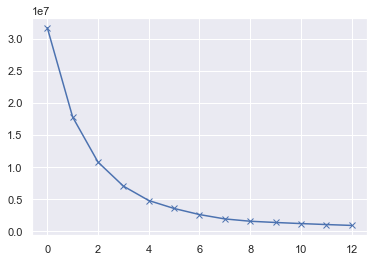

In [ ]:
plt.plot(cost,'bx-')

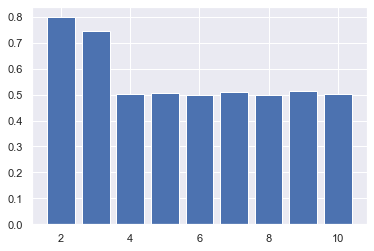

[0.798431703711297, 0.7456922179352494, 0.5009846059357891, 0.5068178856992321, 0.5002755524933264, 0.5105946248480312, 0.4981970819556473, 0.5124540533090188, 0.5014803019972507]


In [ ]:
silhouette_avgs = []
ks = range(2, 11)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(train)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(train, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    
silhouette_avgs
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)

In [ ]:
final_n_clusters = 3
final_kmeans = KMeans(final_n_clusters)
final_kmeans.fit(train)

KMeans(n_clusters=3)

In [ ]:
y_kmeans = final_kmeans.predict(train)
y_kmeans

array([0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 0, 1, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [ ]:
print(final_kmeans.score(train))
silhouette_avg = metrics.silhouette_score(train, y_kmeans)
print(silhouette_avg)
print(metrics.calinski_harabasz_score(train, y_kmeans))

-17804820.482804492
0.7456922179352494
346.0023369577812


In [ ]:
y = pd.DataFrame(y_kmeans, columns =['y'])
frames = [train, y]
result = pd.concat(frames, axis=1)
result

貼文形式_有文字的比例  貼文形式_有超連結的比例        直播        影片        照片  經營個人形象比例  \
0      0.985816      0.226950  0.112903  0.169355  0.687943  0.148936   
1      0.954023      0.666667  0.314286  0.185714  0.310345  0.229885   
2      0.987124      0.356223  0.099476  0.099476  0.708155  0.042918   
3      0.975610      0.548780  0.126984  0.039683  0.804878  0.036585   
4      1.000000      0.441379  0.077670  0.106796  0.731034  0.055172   
..          ...           ...       ...       ...       ...       ...   
88     0.896970      0.193939  0.243902  0.085366  0.533333  0.036364   
89     0.967213      0.754098  0.025424  0.152542  0.778689  0.057377   
90     0.980769      0.530769  0.113725  0.149020  0.603846  0.050000   
91     0.976331      0.242604  0.153846  0.153846  0.532544  0.112426   
92     0.993056      0.222222  0.000000  0.056338  0.888889  0.112426   

    陳述政績與政見比例      攻擊對手      回應攻擊      造勢推廣      時事分享      其他比例  發文數   分享數  \
0    0.063830  0.000000  0.000000  0.255319  0.042553  0.198582  141  12.0   
1    0.000000  0.000000  0.034483  0.137931  0.034483  0.160920   87   8.0   
2    0.103004  0.012876  0.000000  0.214592  0.107296  0.188841  233  10.0   
3    0.006098  0.365854  0.000000  0.189024  0.000000  0.024390  164  35.5   
4    0.048276  0.034483  0.000000  0.303448  0.186207  0.006897  145  82.0   
..        ...       ...       ...       ...       ...       ...  ...   ...   
88   0.048485  0.000000  0.000000  0.545455  0.212121  0.054545  165  10.0   
89   0.147541  0.049180  0.016393  0.442623  0.221311  0.016393  122  33.0   
90   0.084615  0.030769  0.011538  0.576923  0.207692  0.015385  260   4.0   
91   0.106509  0.207101  0.005917  0.124260  0.307692  0.136095  169  21.0   
92   0.106509  0.207101  0.005917  0.124260  0.307692  0.136095  169  11.0   

      留言數      讚數  love  haha  wow  y  
0    51.0   942.0   0.0     0    0  0  
1    38.0     0.0   0.0     0    0  0  
2    35.0   565.0   0.0     0    0  0  
3   146.0  1480.5   0.0     0    0  0  
4   177.0  6111.0   0.0     0    0  1  
..    ...     ...   ...   ...  ... ..  
88   33.0   281.0   4.0     0    0  0  
89   42.0   862.5   8.0     0    0  0  
90   23.0   255.5   3.0     0    0  0  
91   50.0   630.0   4.0     0    0  0  
92   52.5   459.5   4.0     0    0  0  

[93 rows x 20 columns]

In [ ]:
result.to_csv(r'result_全部data.csv', index = False)

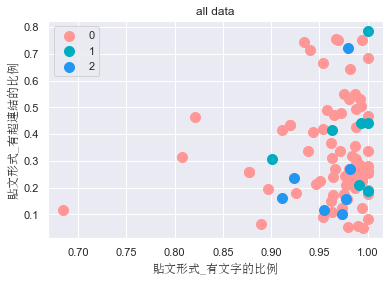

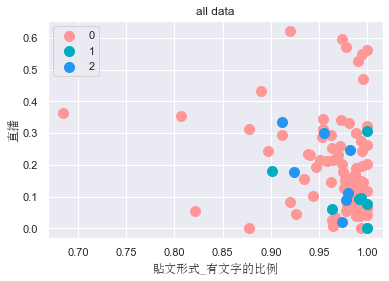

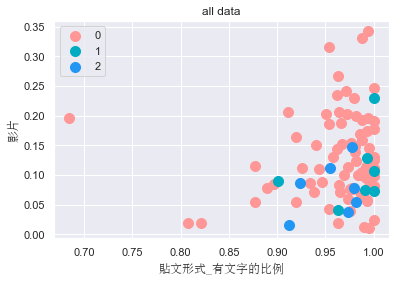

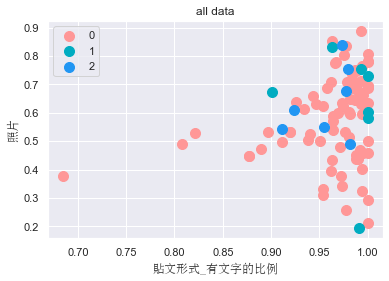

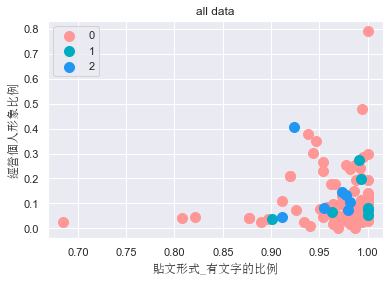

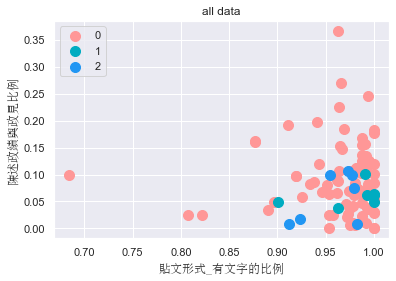

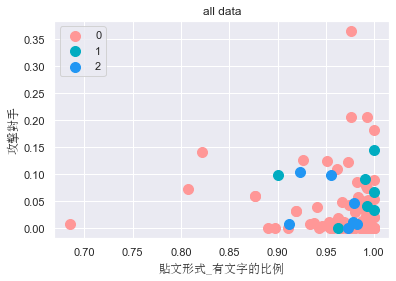

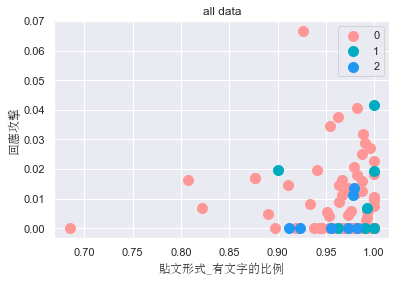

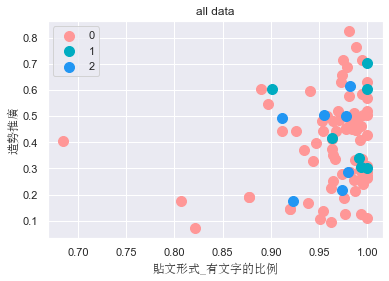

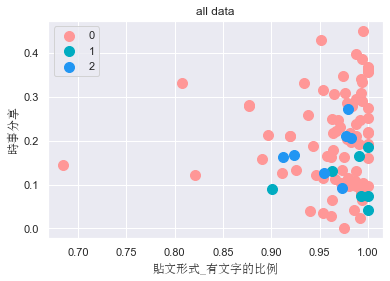

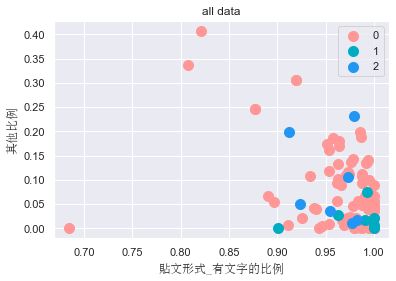

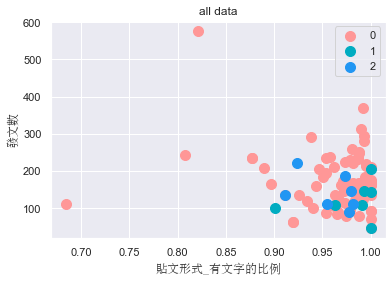

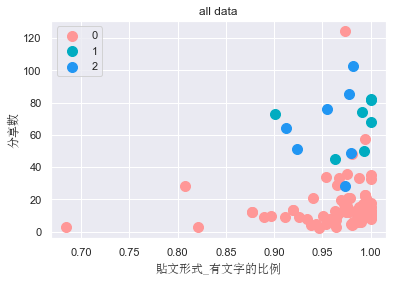

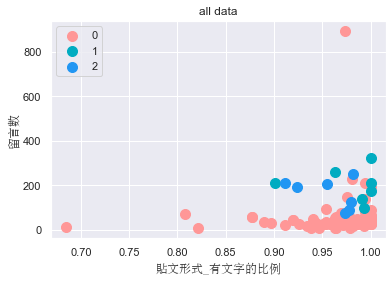

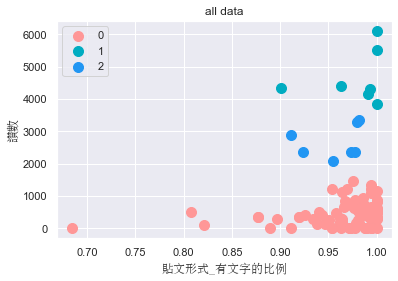

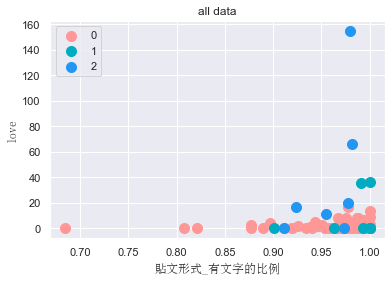

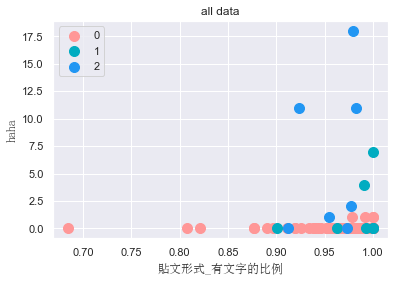

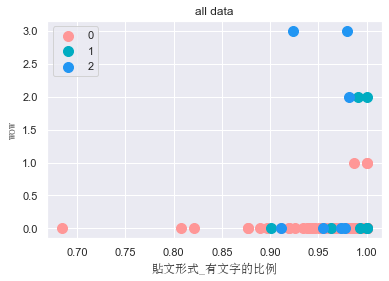

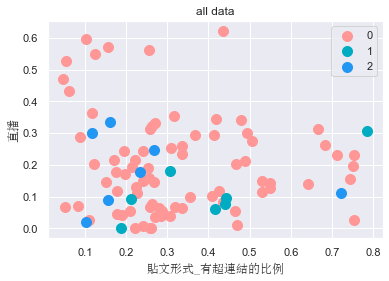

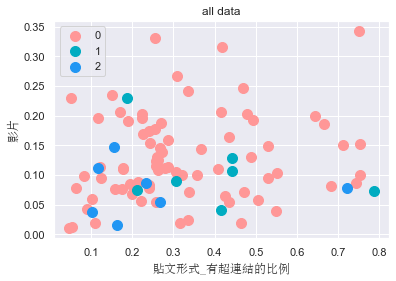

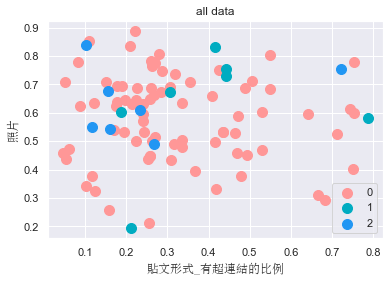

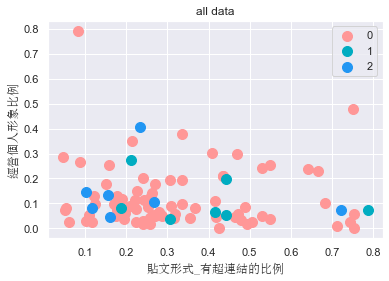

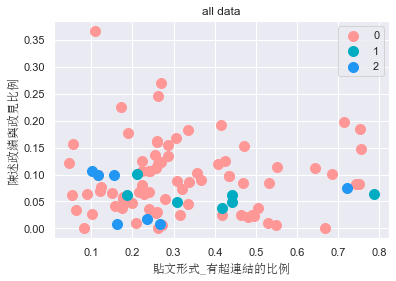

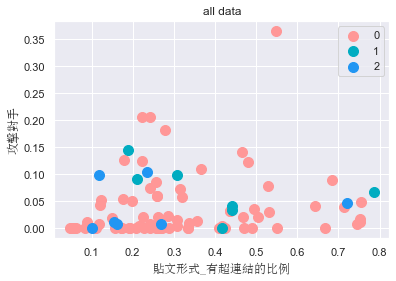

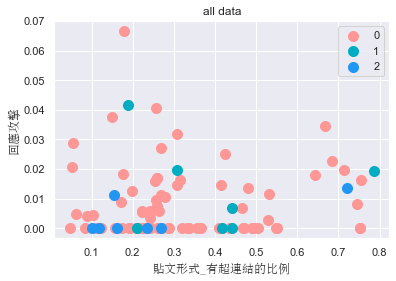

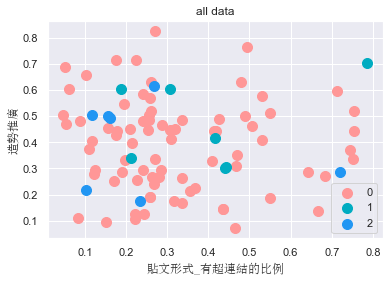

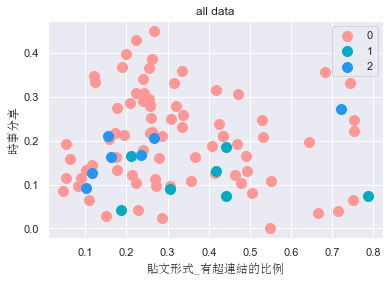

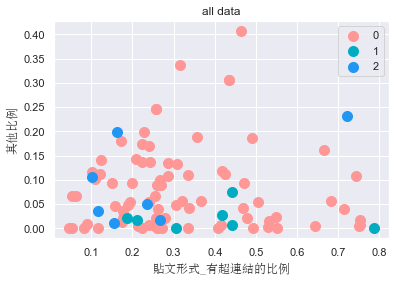

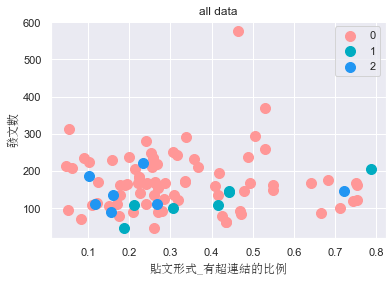

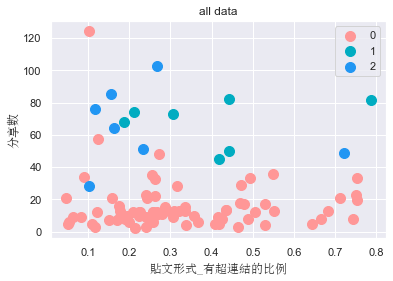

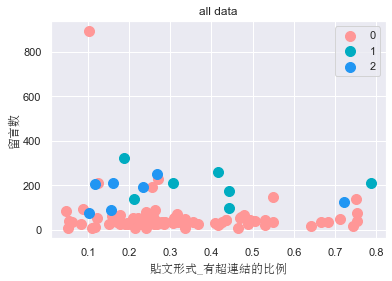

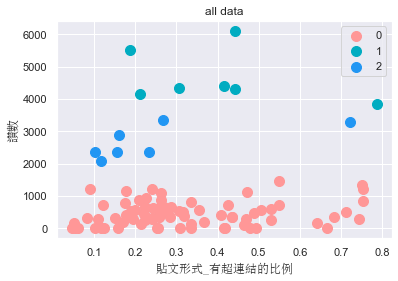

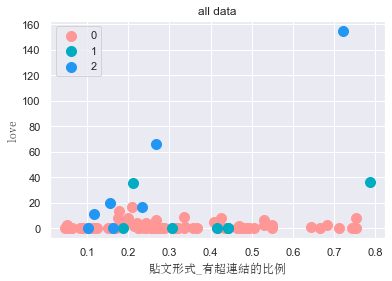

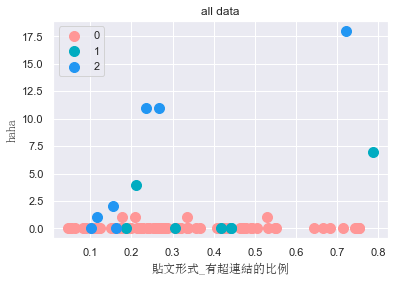

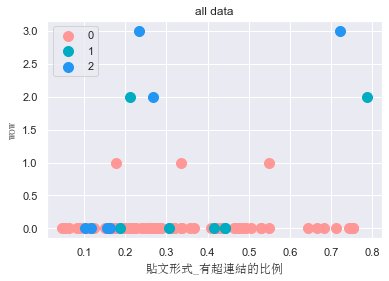

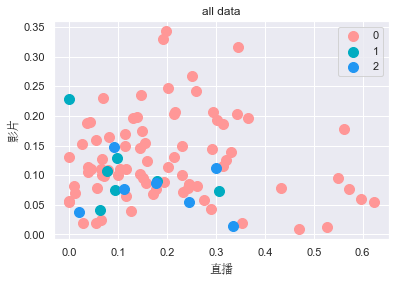

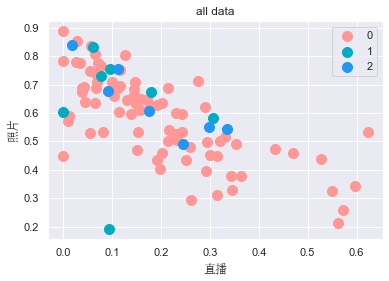

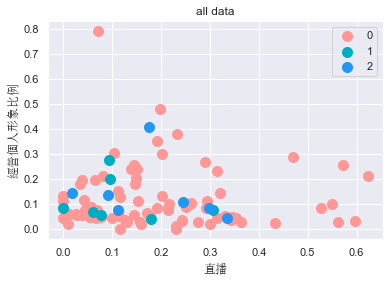

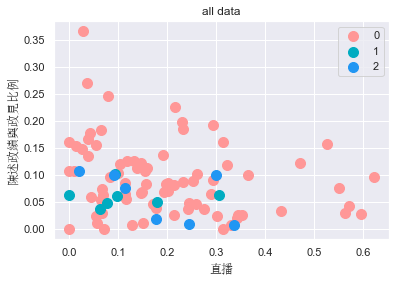

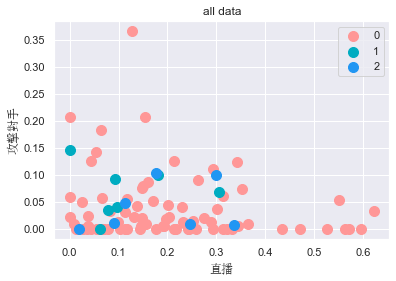

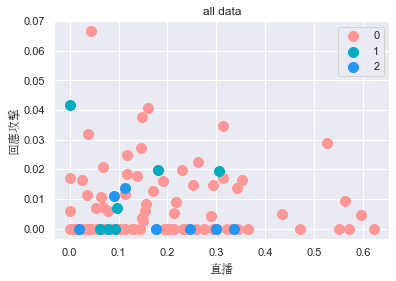

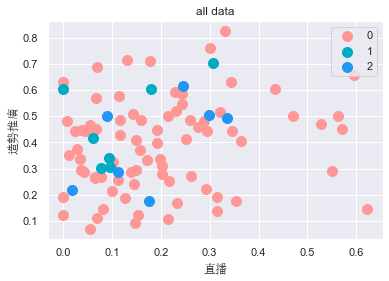

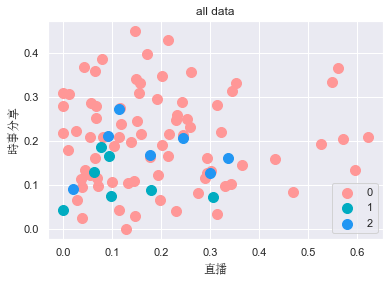

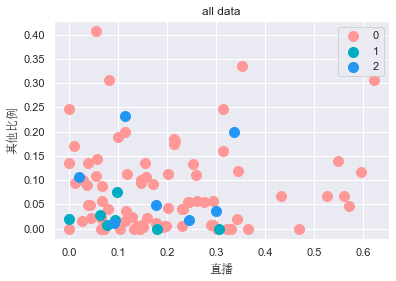

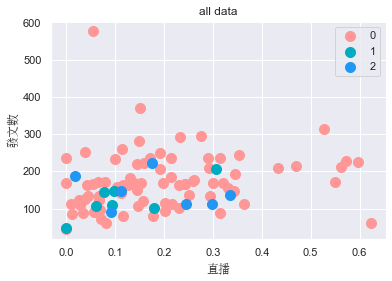

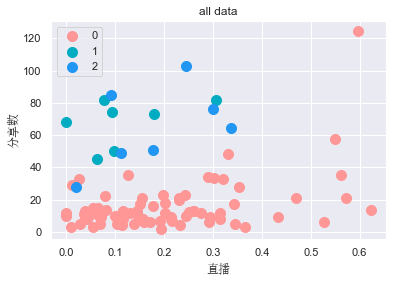

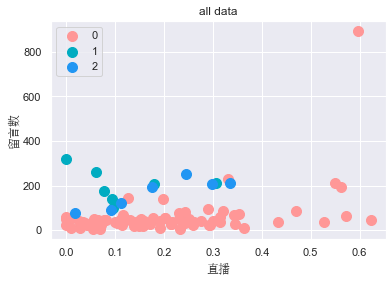

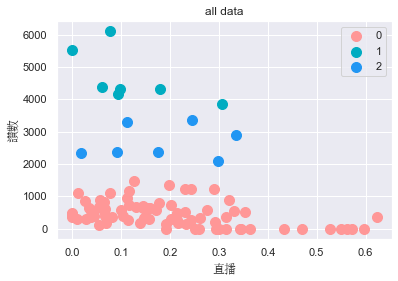

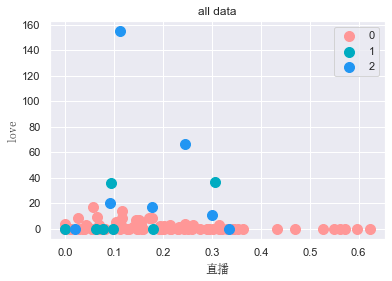

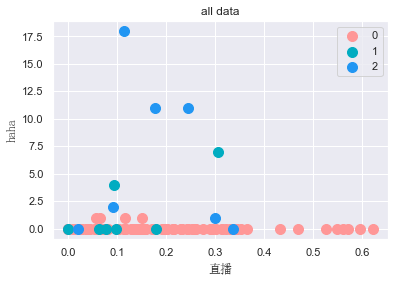

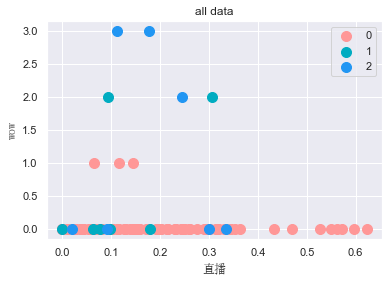

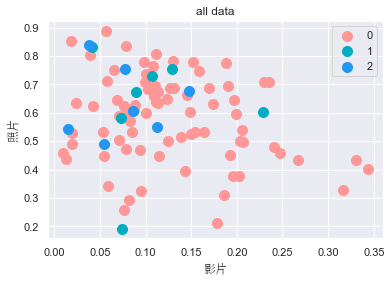

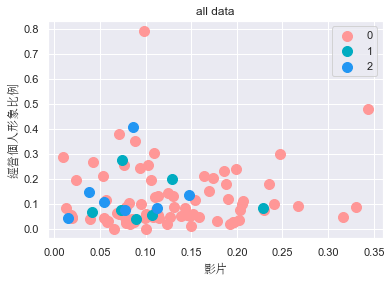

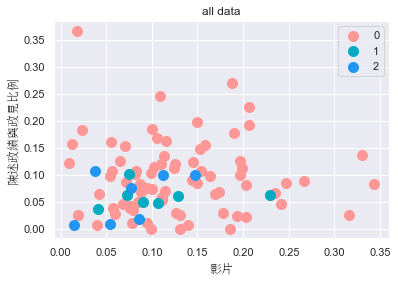

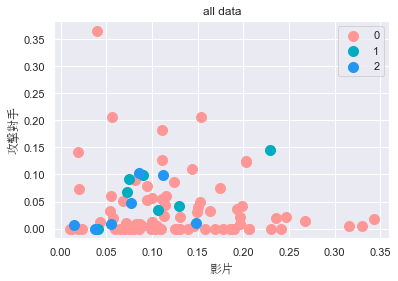

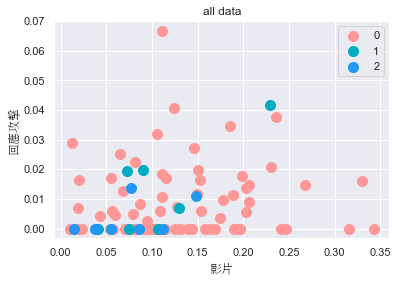

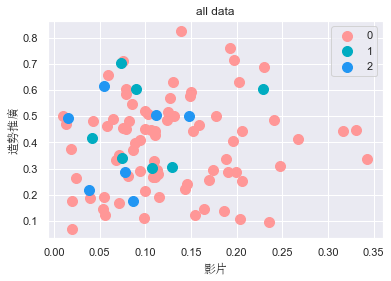

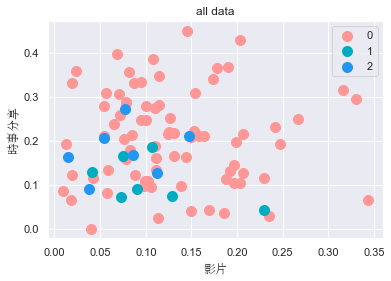

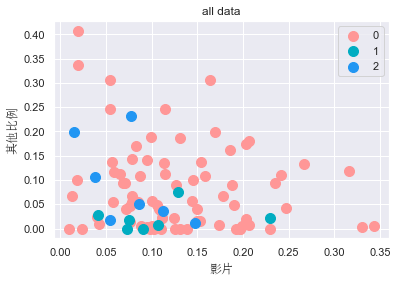

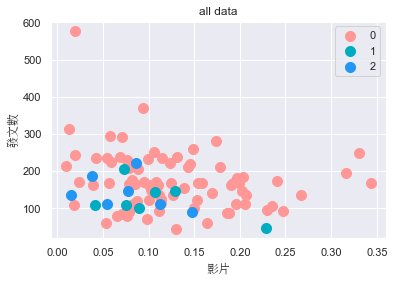

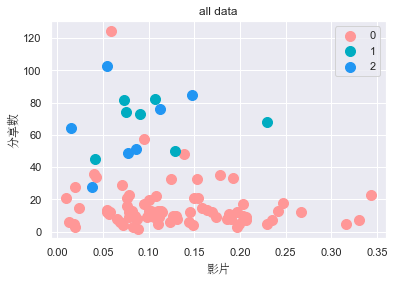

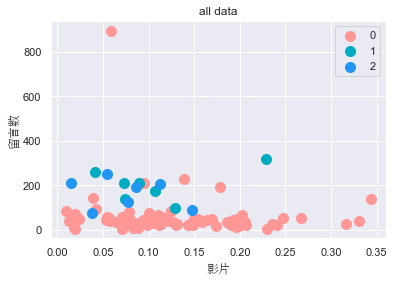

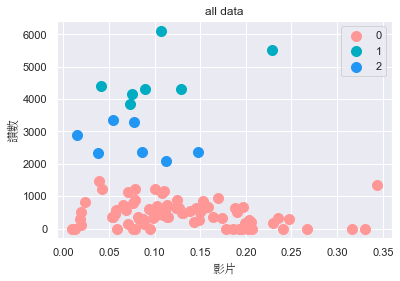

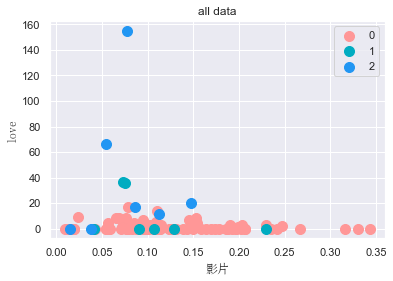

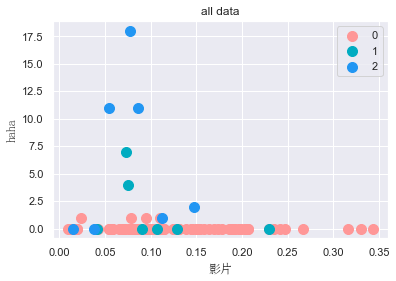

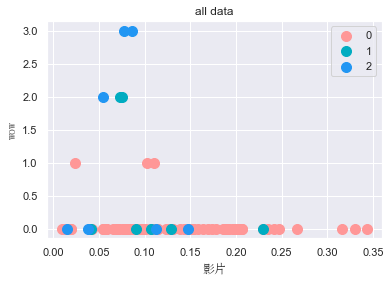

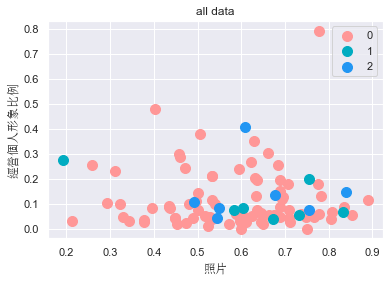

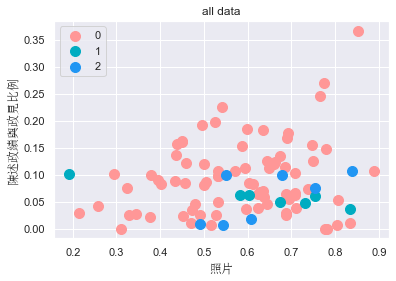

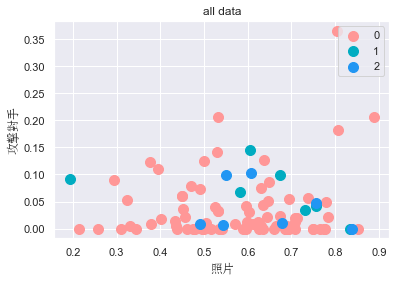

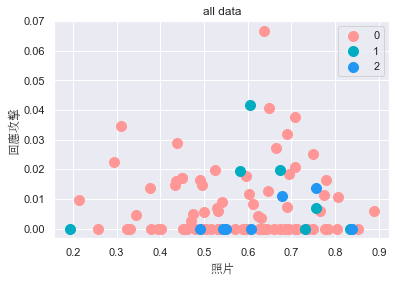

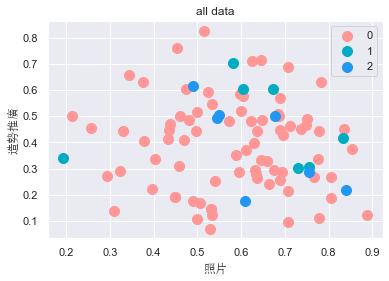

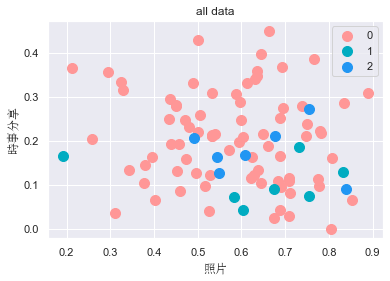

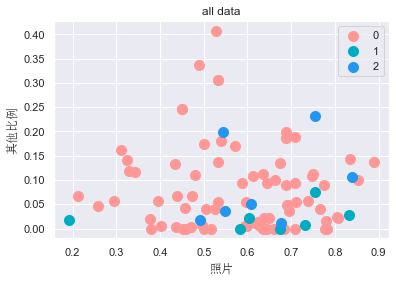

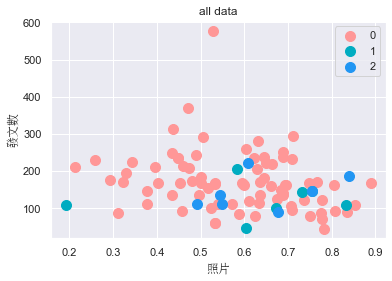

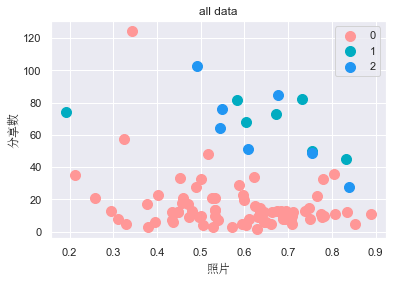

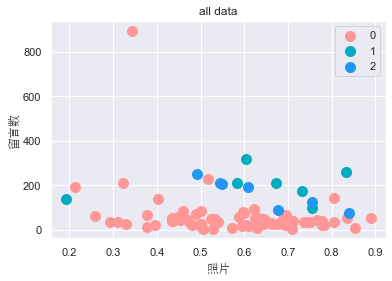

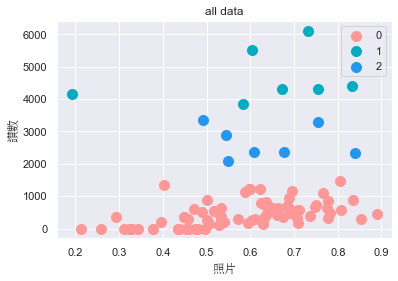

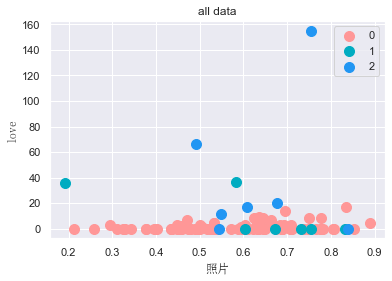

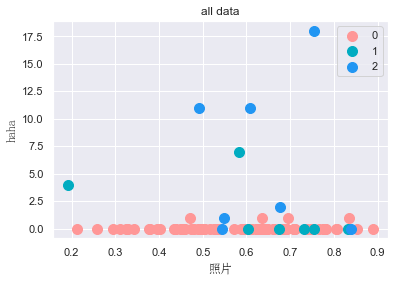

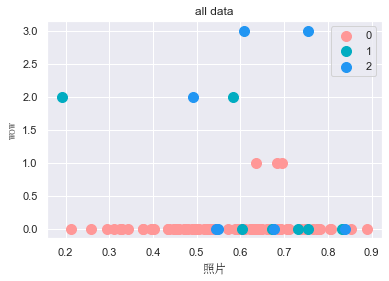

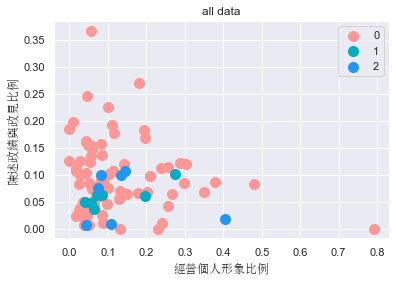

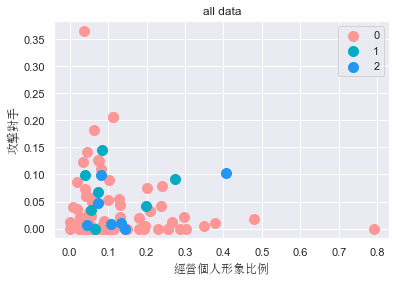

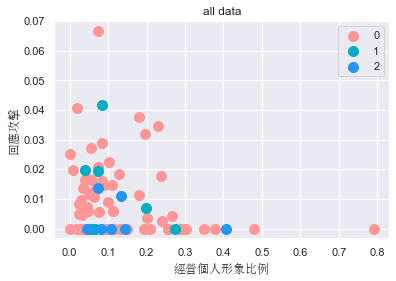

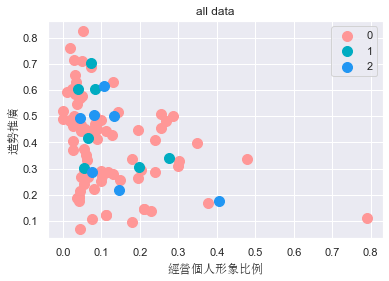

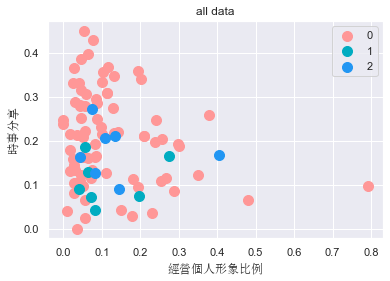

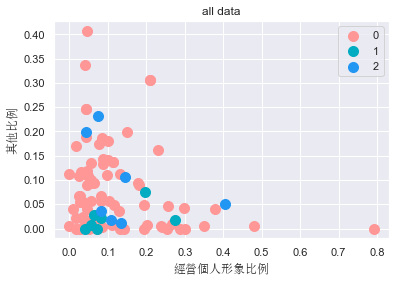

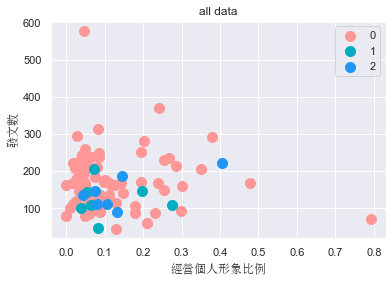

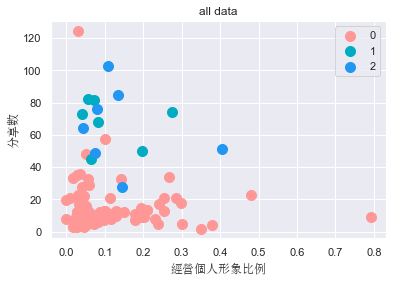

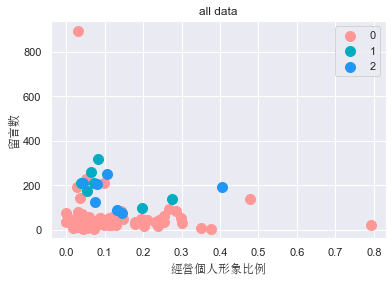

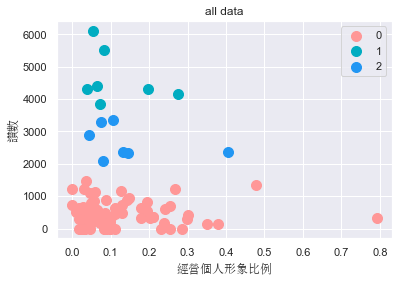

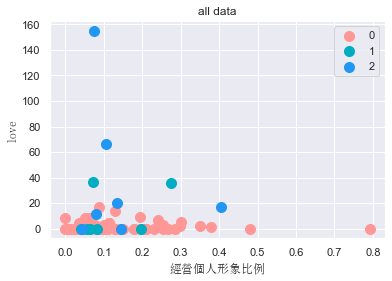

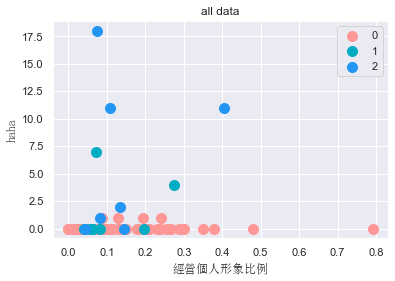

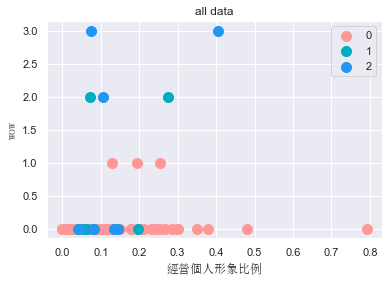

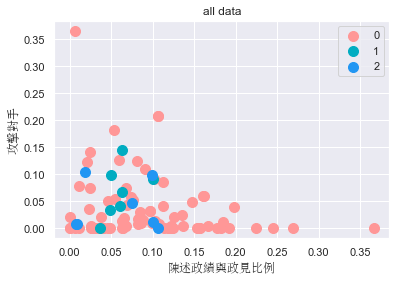

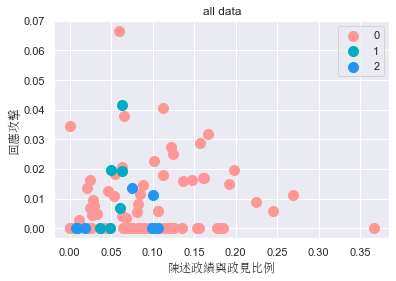

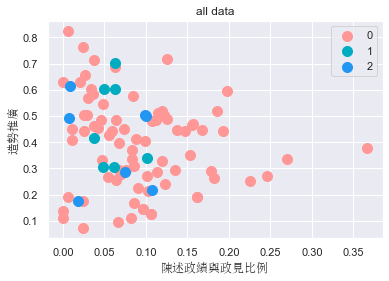

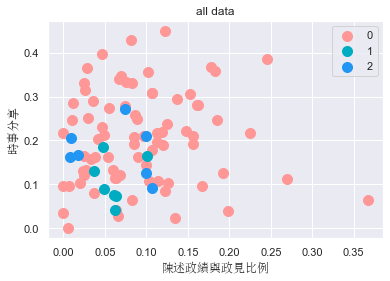

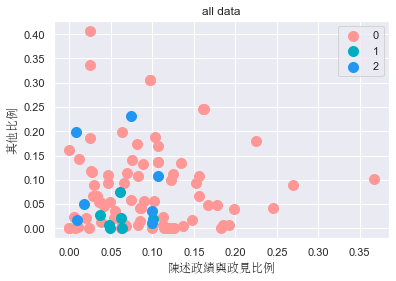

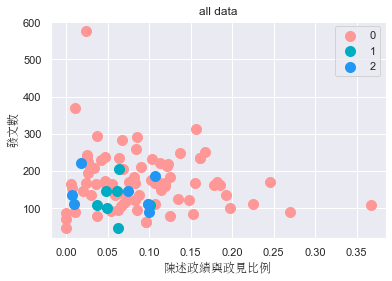

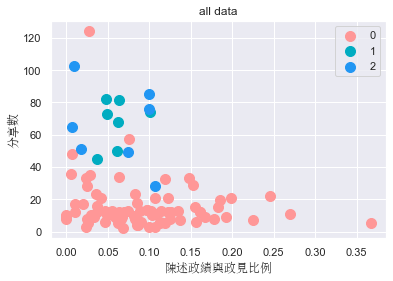

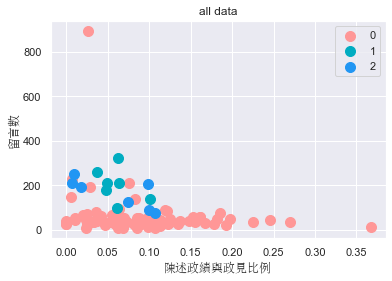

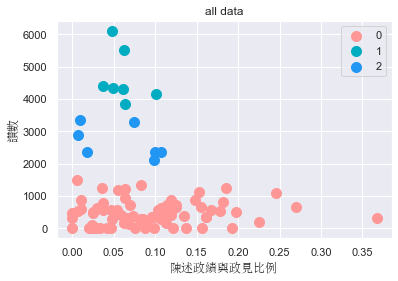

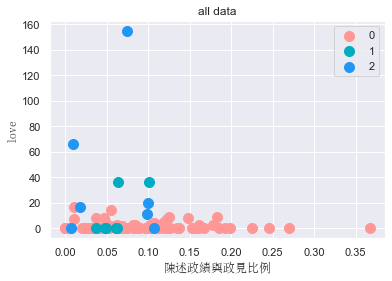

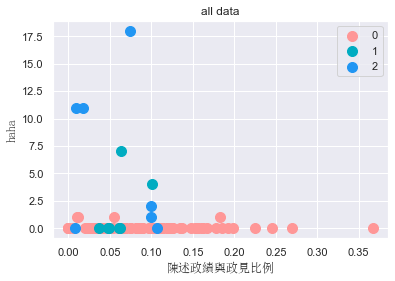

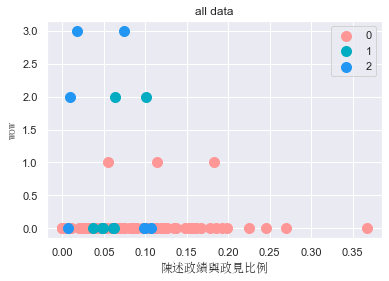

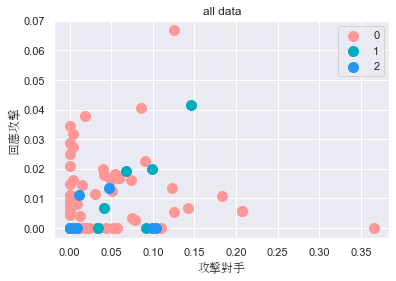

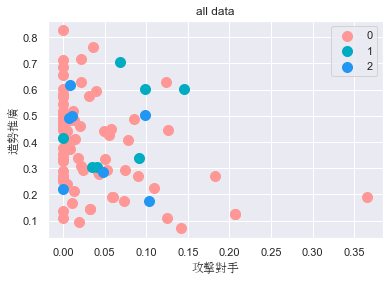

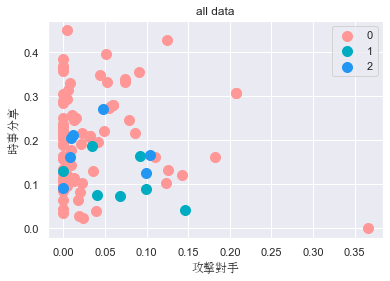

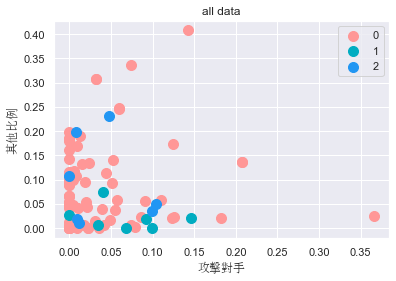

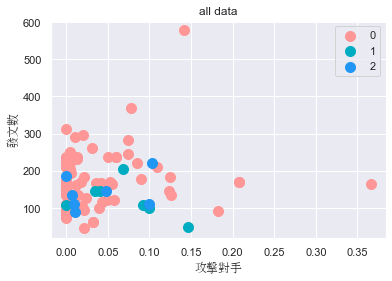

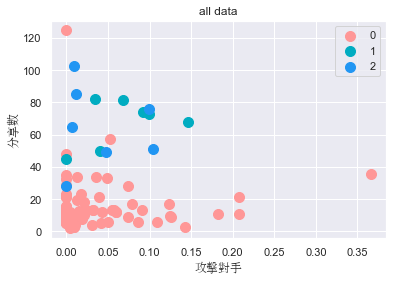

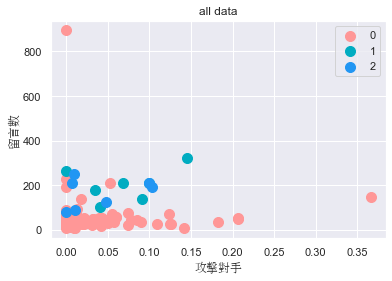

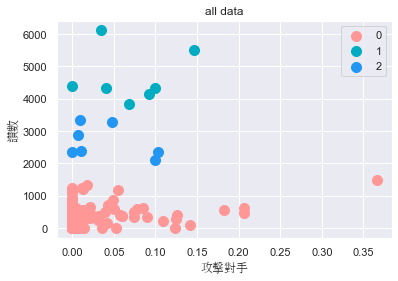

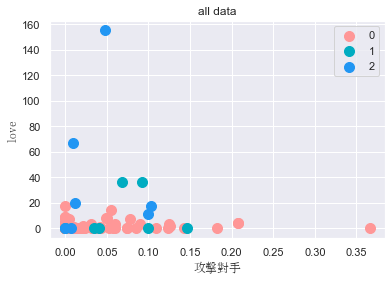

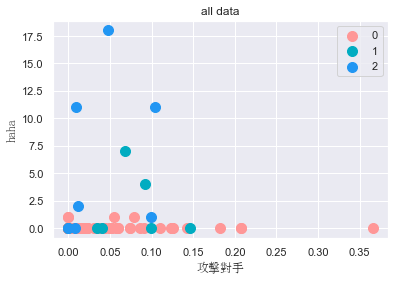

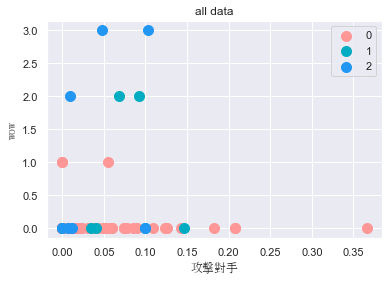

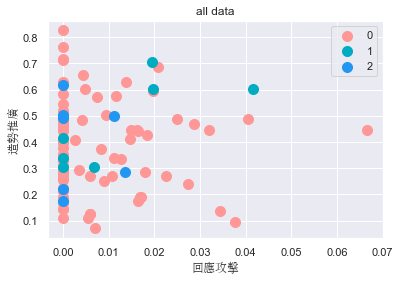

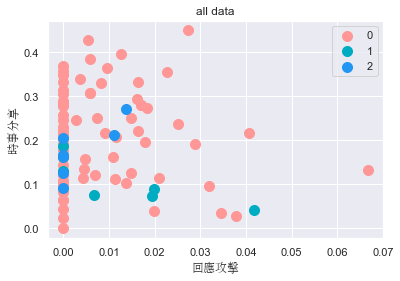

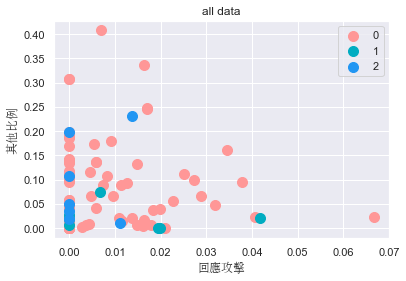

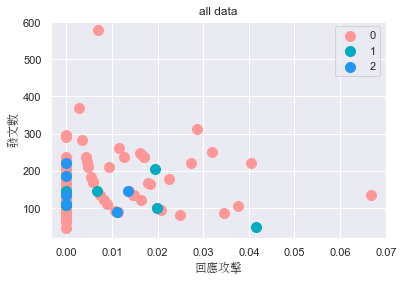

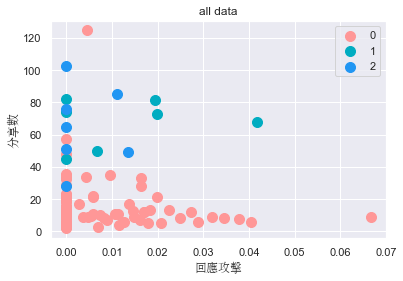

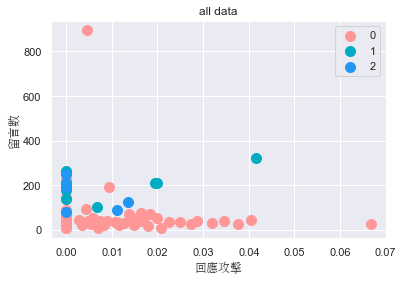

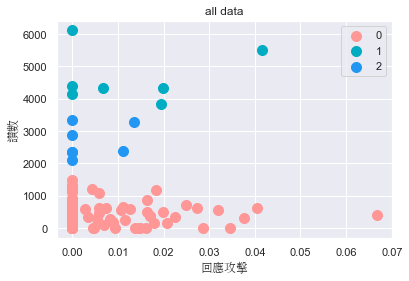

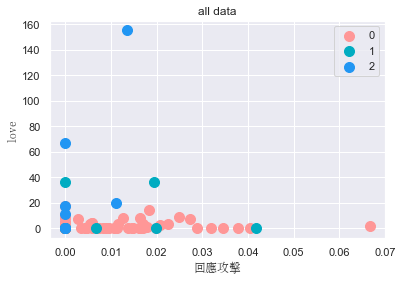

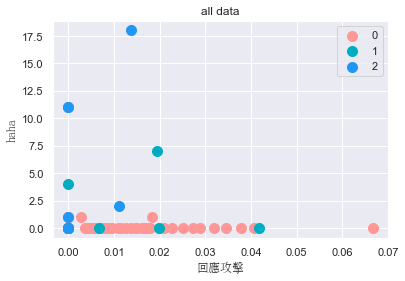

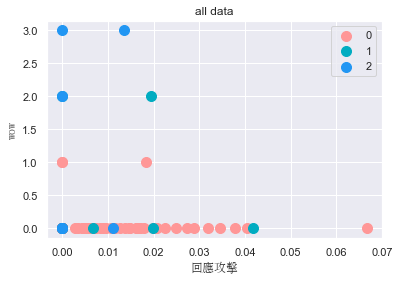

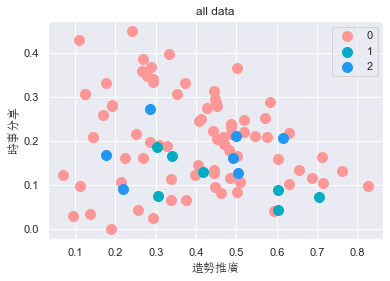

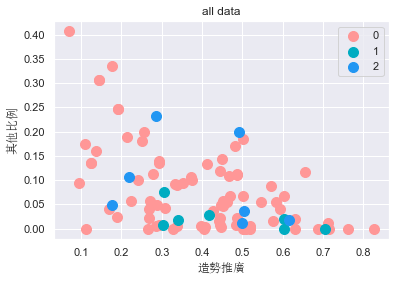

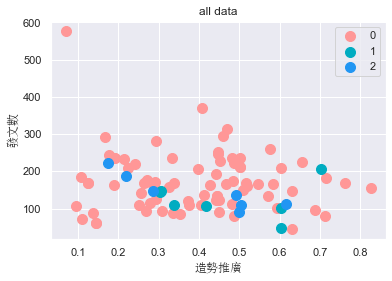

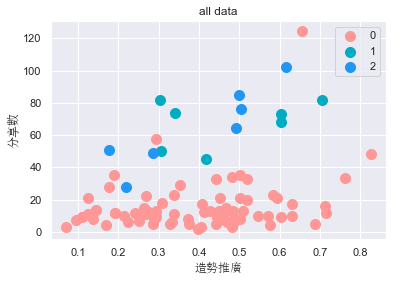

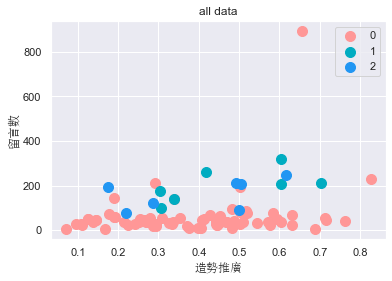

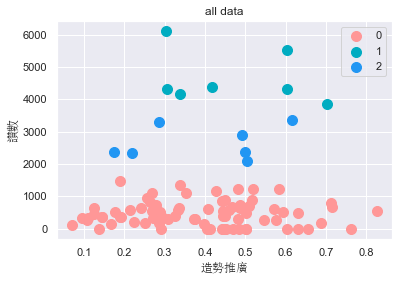

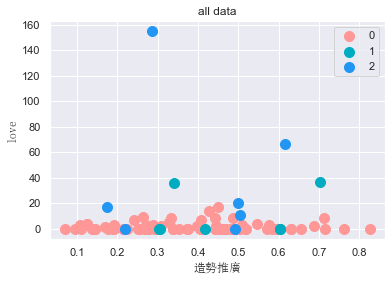

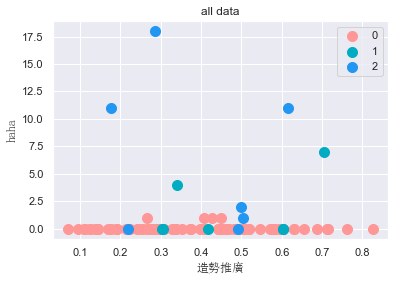

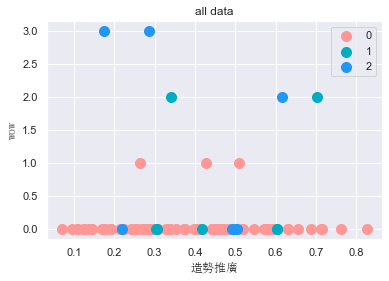

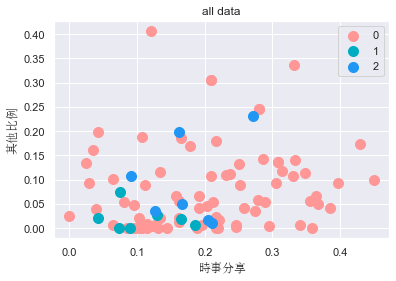

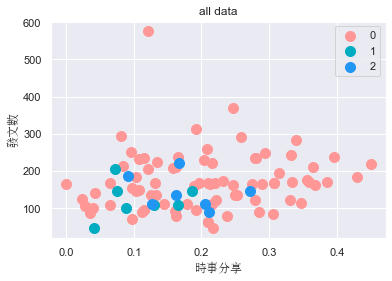

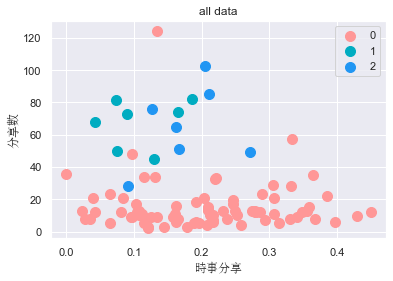

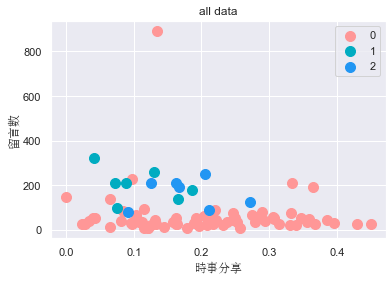

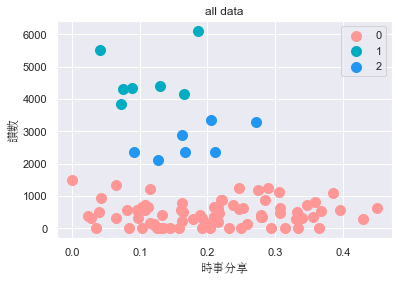

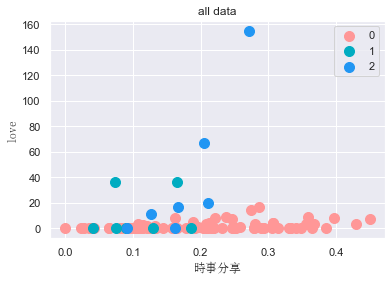

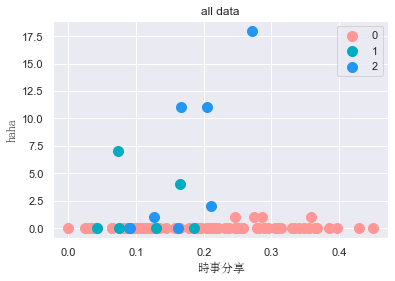

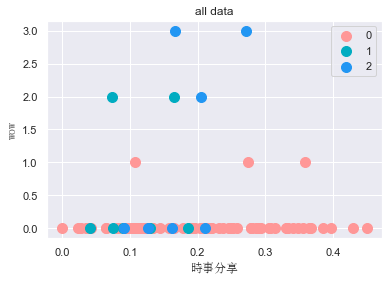

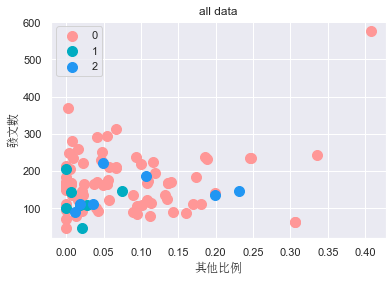

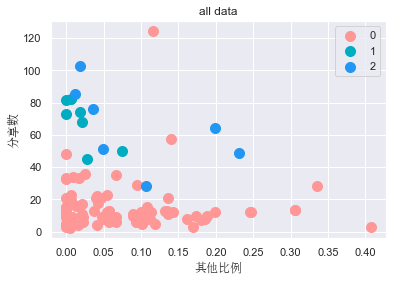

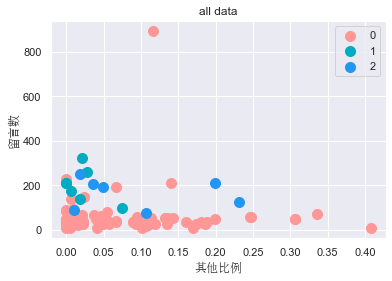

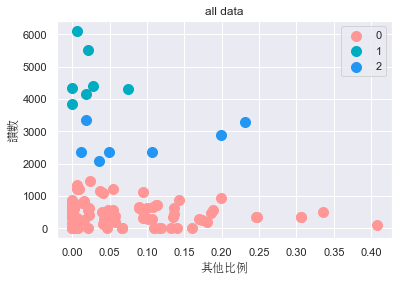

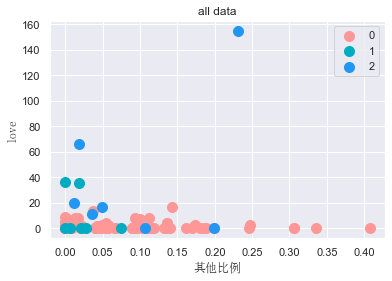

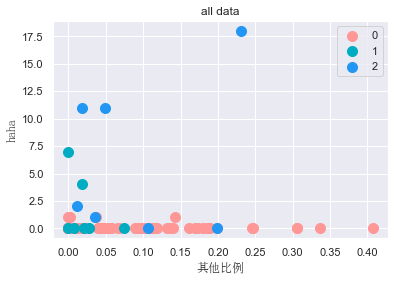

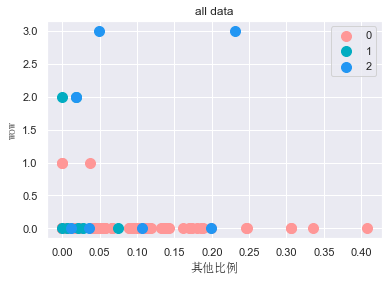

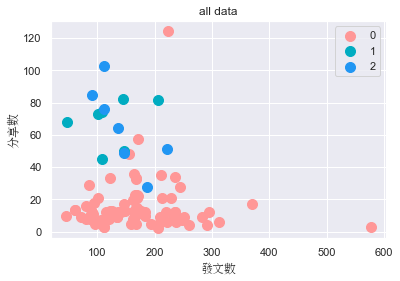

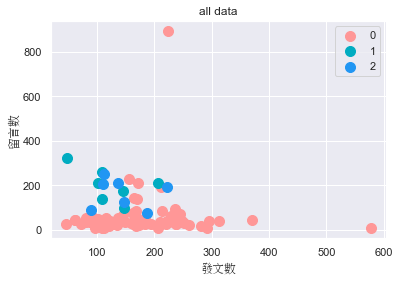

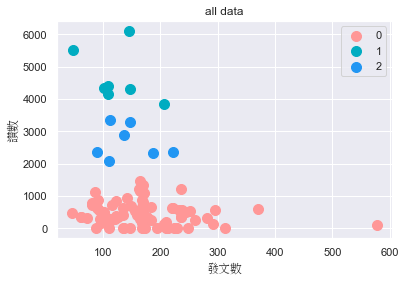

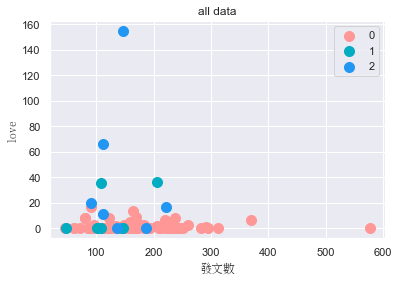

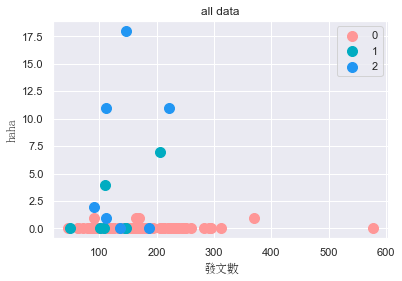

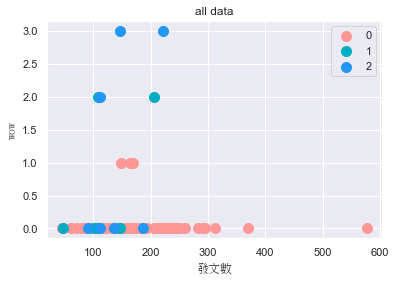

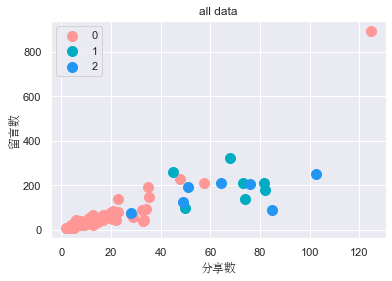

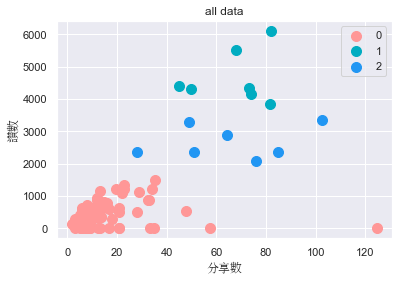

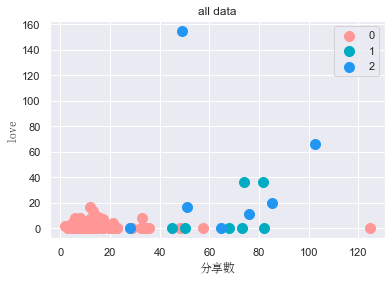

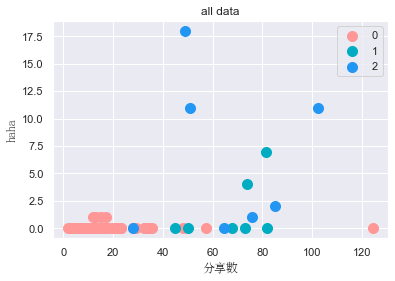

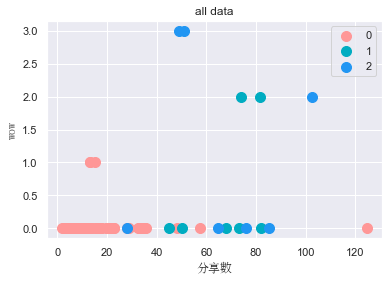

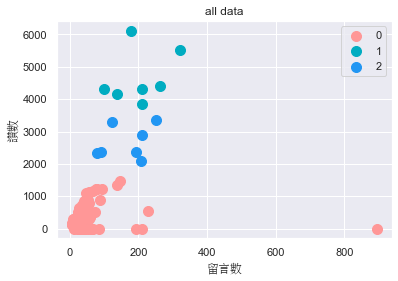

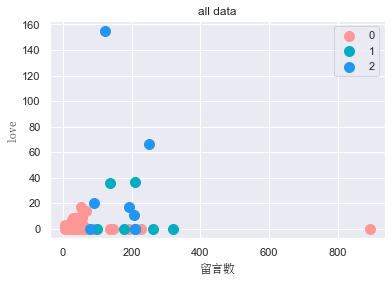

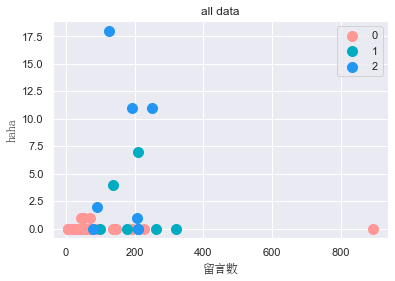

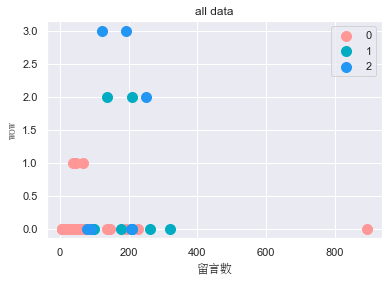

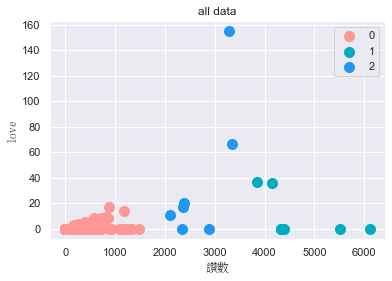

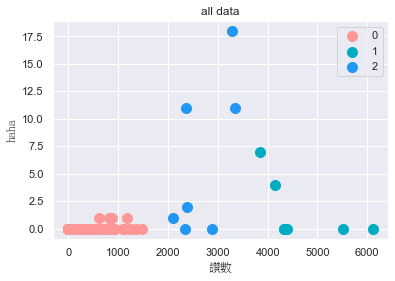

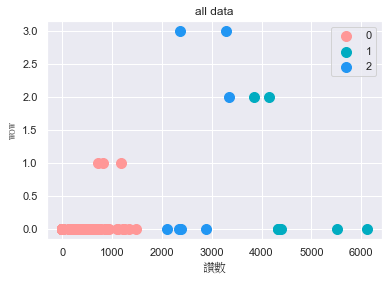

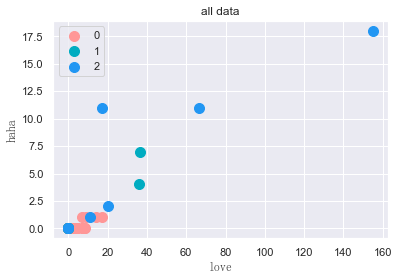

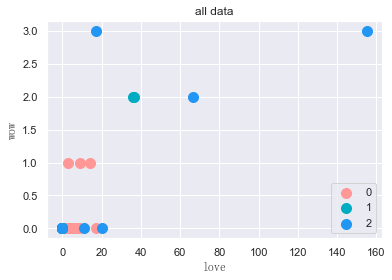

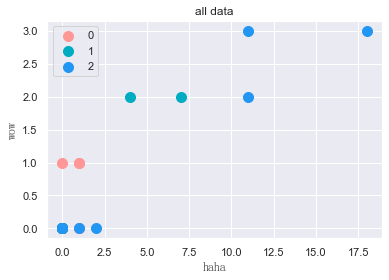

In [ ]:
cols = list(train.columns)
N = len(cols)

os.makedirs('全部data')
color = ['#FF9797','#00ACC1', '#2196F3']
for i in range(N):
    for j in range(i+1, N):  
        plt.title('all data')
        for k in range(3):
            df = result.loc[result['y'] == k]
            plt.scatter(df.loc[:, cols[i]], df.loc[:, cols[j]], s=100, c=color[k], label=k)
#         plt.scatter(train.loc[:, cols[i]], train.loc[:, cols[j]], c=y_kmeans, s=200, cmap='viridis')
        plt.legend(loc='best')
        plt.xlabel(cols[i], fontsize=12, fontproperties="SimSun") #x軸標題
        plt.ylabel(cols[j], fontsize=12, fontproperties="SimSun") #y軸標題
#     plt.tight_layout() #隔開兩個圖
        plt.savefig('./全部data/'+cols[i]+'&'+cols[j]+'.png')#儲存圖片
        plt.show()

# 互動加總

In [ ]:
interaction_li = []
size = len(train)
for i in range(len(train)):
    interaction = train.loc[i, '發文數'] + train.loc[i,'分享數'] + train.loc[i,'留言數'] + train.loc[i,'讚數']
    interaction_li.append(interaction)

In [ ]:
train_data = train.drop(['發文數', '分享數', '留言數', '讚數'], 1)
interact = pd.DataFrame(interaction_li, columns =['interaction']) 

In [ ]:
frames = [train_data, interact]
train_data = pd.concat(frames, axis=1)
train_data

貼文形式_有文字的比例  貼文形式_有超連結的比例        直播        影片        照片  經營個人形象比例  \
0      0.985816      0.226950  0.112903  0.169355  0.687943  0.148936   
1      0.954023      0.666667  0.314286  0.185714  0.310345  0.229885   
2      0.987124      0.356223  0.099476  0.099476  0.708155  0.042918   
3      0.975610      0.548780  0.126984  0.039683  0.804878  0.036585   
4      1.000000      0.441379  0.077670  0.106796  0.731034  0.055172   
..          ...           ...       ...       ...       ...       ...   
88     0.896970      0.193939  0.243902  0.085366  0.533333  0.036364   
89     0.967213      0.754098  0.025424  0.152542  0.778689  0.057377   
90     0.980769      0.530769  0.113725  0.149020  0.603846  0.050000   
91     0.976331      0.242604  0.153846  0.153846  0.532544  0.112426   
92     0.993056      0.222222  0.000000  0.056338  0.888889  0.112426   

    陳述政績與政見比例      攻擊對手      回應攻擊      造勢推廣      時事分享      其他比例  love  haha  \
0    0.063830  0.000000  0.000000  0.255319  0.042553  0.198582   0.0     0   
1    0.000000  0.000000  0.034483  0.137931  0.034483  0.160920   0.0     0   
2    0.103004  0.012876  0.000000  0.214592  0.107296  0.188841   0.0     0   
3    0.006098  0.365854  0.000000  0.189024  0.000000  0.024390   0.0     0   
4    0.048276  0.034483  0.000000  0.303448  0.186207  0.006897   0.0     0   
..        ...       ...       ...       ...       ...       ...   ...   ...   
88   0.048485  0.000000  0.000000  0.545455  0.212121  0.054545   4.0     0   
89   0.147541  0.049180  0.016393  0.442623  0.221311  0.016393   8.0     0   
90   0.084615  0.030769  0.011538  0.576923  0.207692  0.015385   3.0     0   
91   0.106509  0.207101  0.005917  0.124260  0.307692  0.136095   4.0     0   
92   0.106509  0.207101  0.005917  0.124260  0.307692  0.136095   4.0     0   

    wow  interaction  
0     0       1146.0  
1     0        133.0  
2     0        843.0  
3     0       1826.0  
4     0       6515.0  
..  ...          ...  
88    0        489.0  
89    0       1059.5  
90    0        542.5  
91    0        870.0  
92    0        692.0  

[93 rows x 16 columns]

In [ ]:
n_clusters = 15
cost = []
for i in range(2,n_clusters):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(train_data)
    cost.append(kmeans.inertia_)

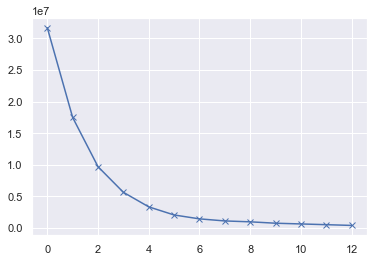

In [ ]:
plt.plot(cost,'bx-')

In [ ]:
silhouette_avgs = []
ks = range(2, 11)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(train_data)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(train_data, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    
silhouette_avgs

[0.8122551821540194,
 0.7648708330780616,
 0.5874213456549432,
 0.597079642403387,
 0.6128140825456865,
 0.6256451914798626,
 0.5899023160486013,
 0.5850381443292945,
 0.572454472532121]

In [ ]:
final_n_clusters = 3
final_kmeans = KMeans(final_n_clusters)
final_kmeans.fit(train_data)

KMeans(n_clusters=3)

In [ ]:
y_kmeans = final_kmeans.predict(train_data)
y_kmeans

array([0, 0, 0, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 0, 1, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [ ]:
print(final_kmeans.score(train_data))
silhouette_avg = metrics.silhouette_score(train_data, y_kmeans)
print(silhouette_avg)
print(metrics.calinski_harabasz_score(train_data, y_kmeans))

-17518455.99447213
0.7525375104149489
378.79582195545265


In [ ]:
y = pd.DataFrame(y_kmeans, columns =['y'])
frames = [train_data, y]
result = pd.concat(frames, axis=1)
result

貼文形式_有文字的比例  貼文形式_有超連結的比例        直播        影片        照片  經營個人形象比例  \
0      0.985816      0.226950  0.112903  0.169355  0.687943  0.148936   
1      0.954023      0.666667  0.314286  0.185714  0.310345  0.229885   
2      0.987124      0.356223  0.099476  0.099476  0.708155  0.042918   
3      0.975610      0.548780  0.126984  0.039683  0.804878  0.036585   
4      1.000000      0.441379  0.077670  0.106796  0.731034  0.055172   
..          ...           ...       ...       ...       ...       ...   
88     0.896970      0.193939  0.243902  0.085366  0.533333  0.036364   
89     0.967213      0.754098  0.025424  0.152542  0.778689  0.057377   
90     0.980769      0.530769  0.113725  0.149020  0.603846  0.050000   
91     0.976331      0.242604  0.153846  0.153846  0.532544  0.112426   
92     0.993056      0.222222  0.000000  0.056338  0.888889  0.112426   

    陳述政績與政見比例      攻擊對手      回應攻擊      造勢推廣      時事分享      其他比例  love  haha  \
0    0.063830  0.000000  0.000000  0.255319  0.042553  0.198582   0.0     0   
1    0.000000  0.000000  0.034483  0.137931  0.034483  0.160920   0.0     0   
2    0.103004  0.012876  0.000000  0.214592  0.107296  0.188841   0.0     0   
3    0.006098  0.365854  0.000000  0.189024  0.000000  0.024390   0.0     0   
4    0.048276  0.034483  0.000000  0.303448  0.186207  0.006897   0.0     0   
..        ...       ...       ...       ...       ...       ...   ...   ...   
88   0.048485  0.000000  0.000000  0.545455  0.212121  0.054545   4.0     0   
89   0.147541  0.049180  0.016393  0.442623  0.221311  0.016393   8.0     0   
90   0.084615  0.030769  0.011538  0.576923  0.207692  0.015385   3.0     0   
91   0.106509  0.207101  0.005917  0.124260  0.307692  0.136095   4.0     0   
92   0.106509  0.207101  0.005917  0.124260  0.307692  0.136095   4.0     0   

    wow  interaction  y  
0     0       1146.0  0  
1     0        133.0  0  
2     0        843.0  0  
3     0       1826.0  2  
4     0       6515.0  1  
..  ...          ... ..  
88    0        489.0  0  
89    0       1059.5  0  
90    0        542.5  0  
91    0        870.0  0  
92    0        692.0  0  

[93 rows x 17 columns]

In [ ]:
result.to_csv(r'result_互動加總.csv', index = False)

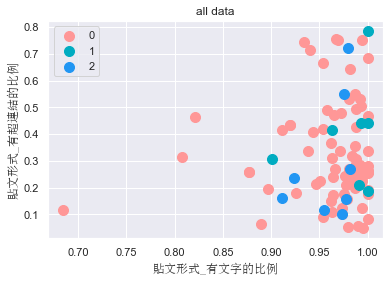

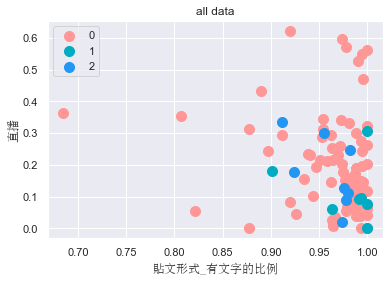

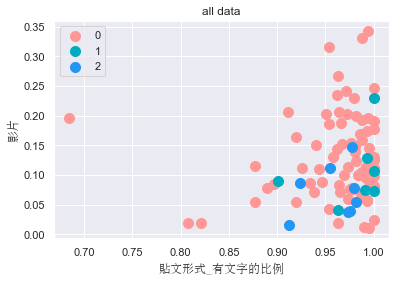

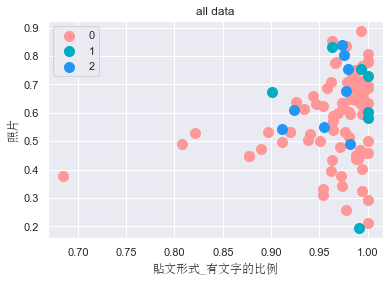

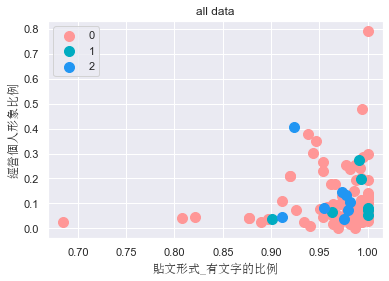

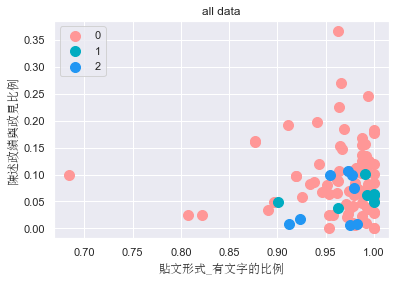

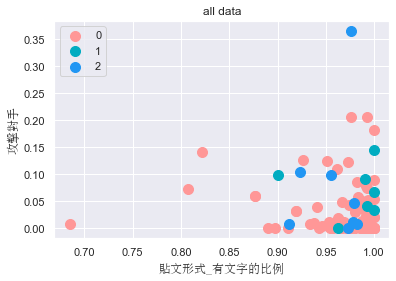

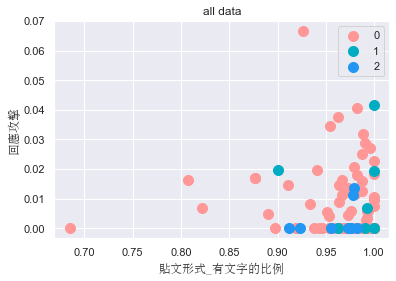

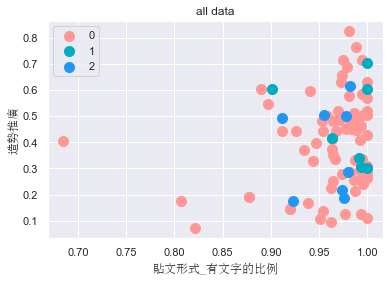

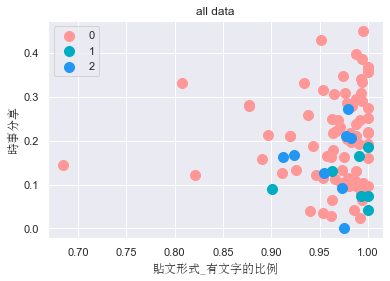

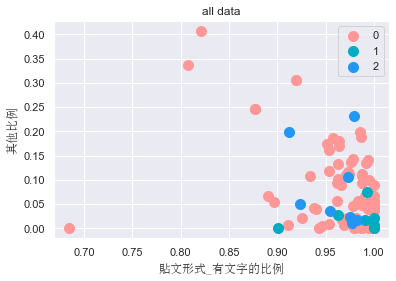

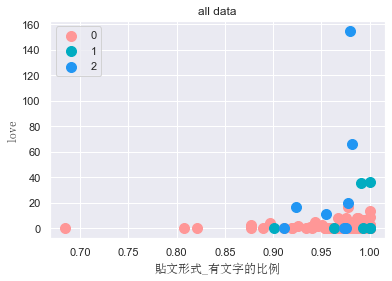

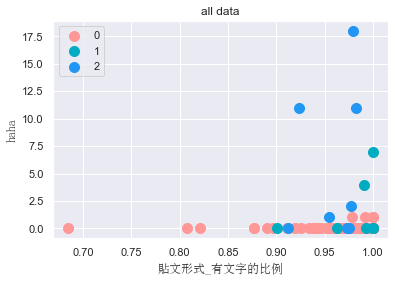

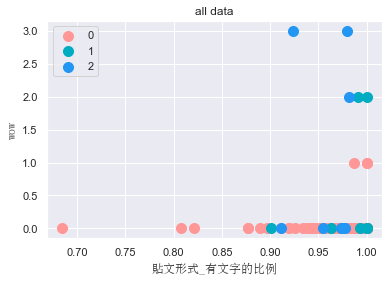

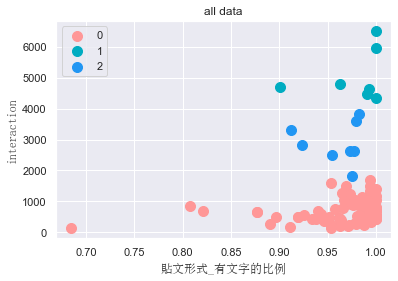

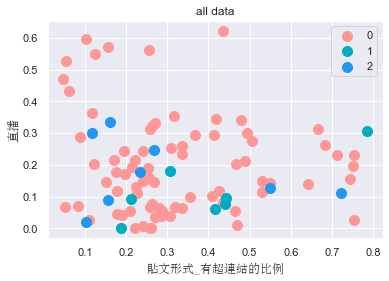

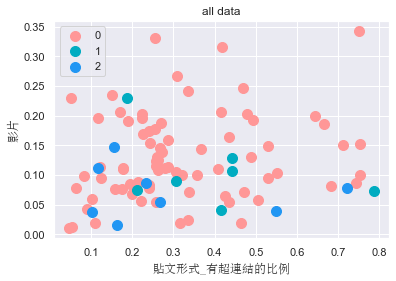

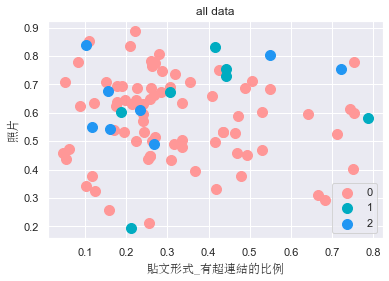

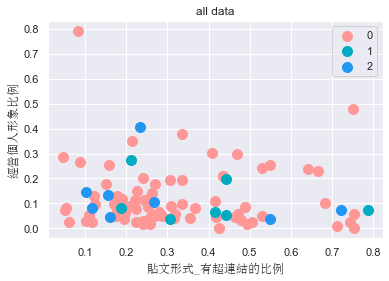

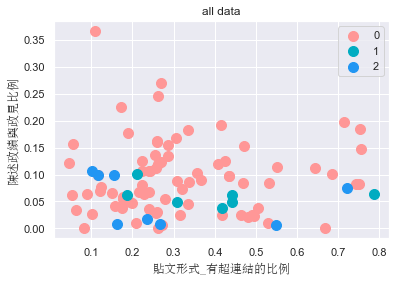

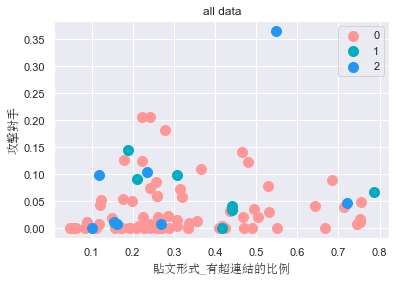

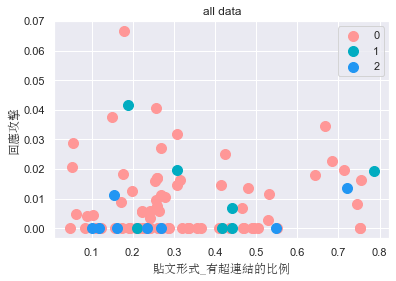

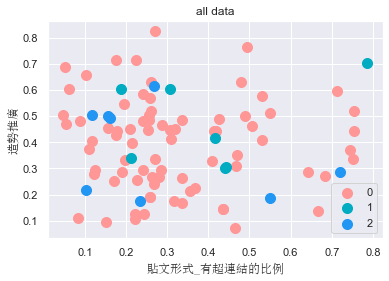

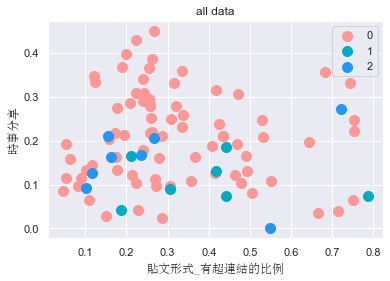

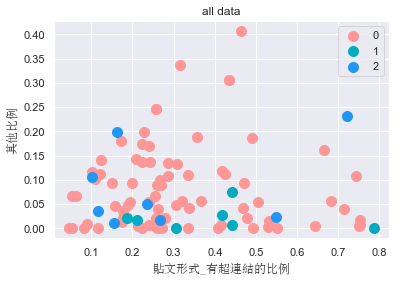

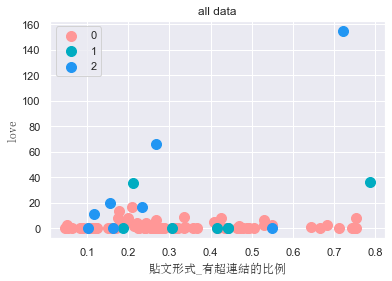

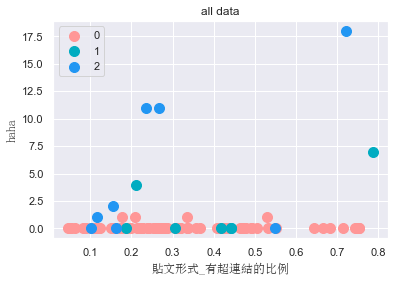

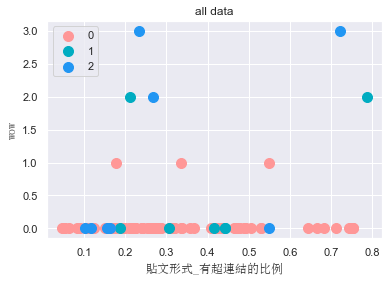

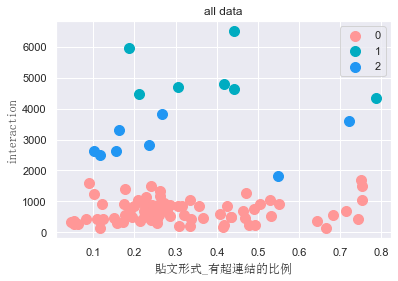

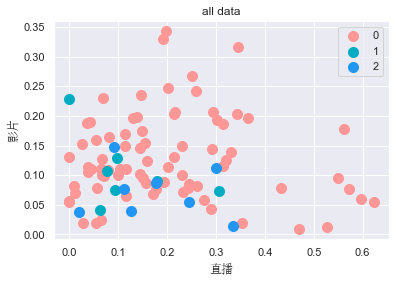

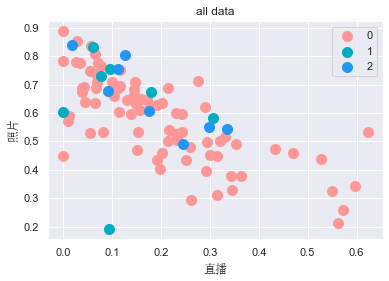

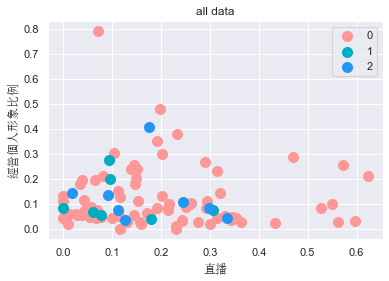

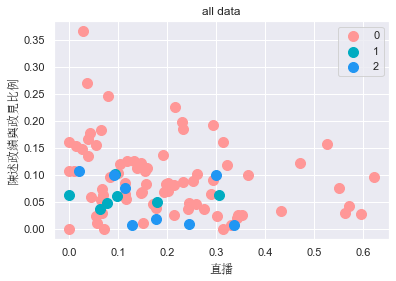

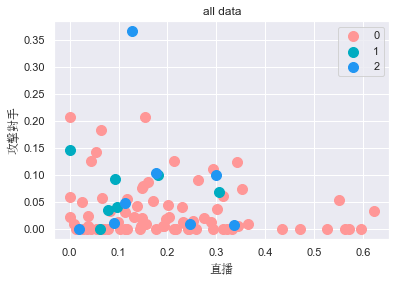

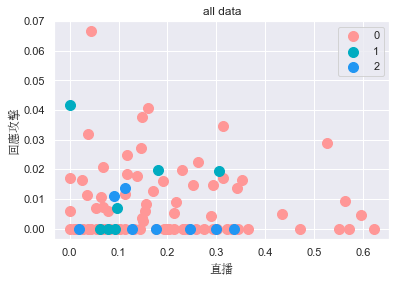

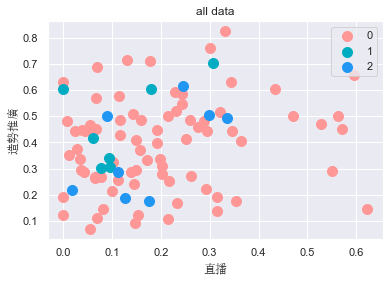

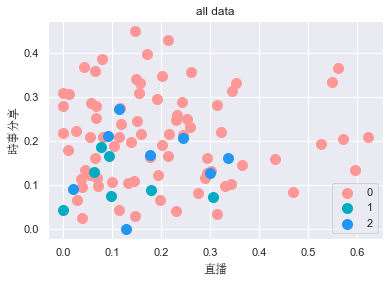

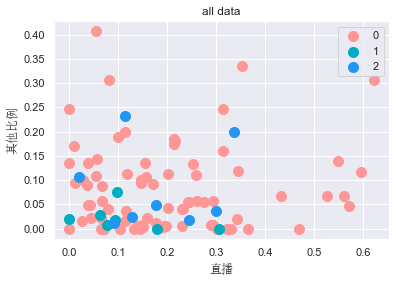

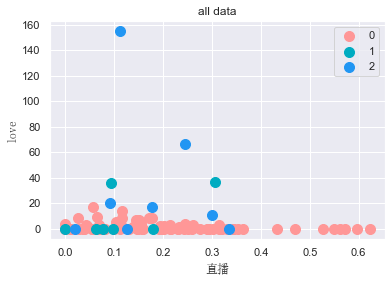

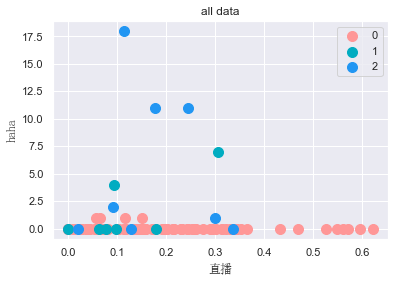

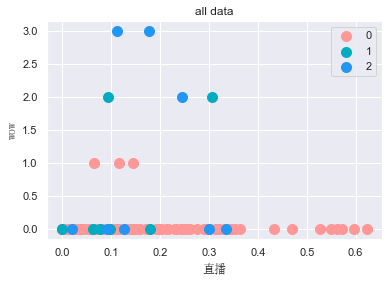

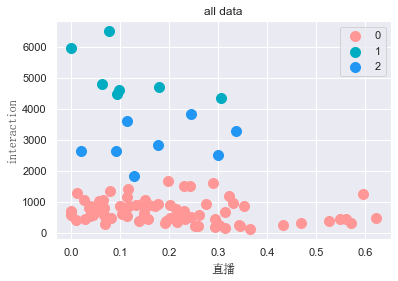

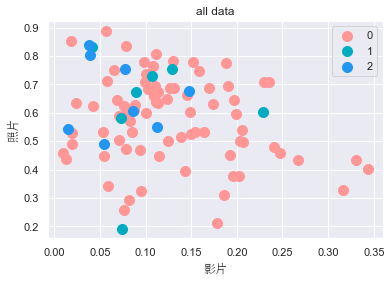

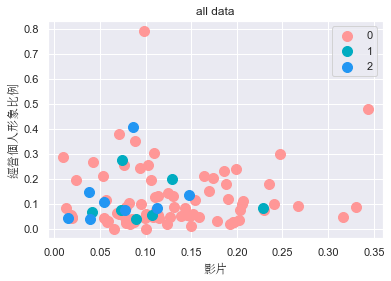

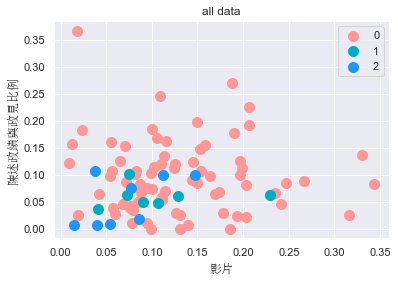

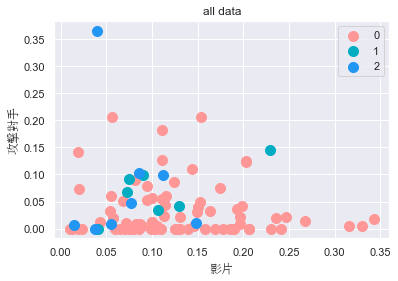

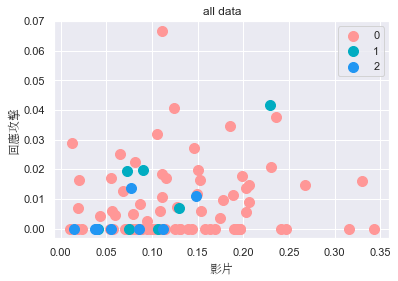

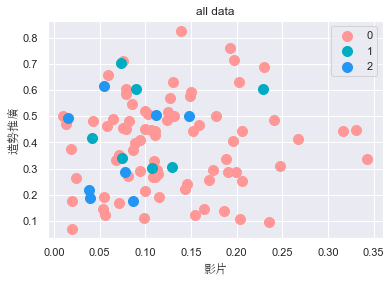

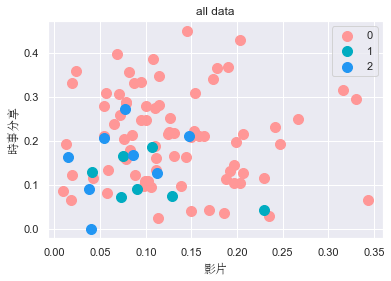

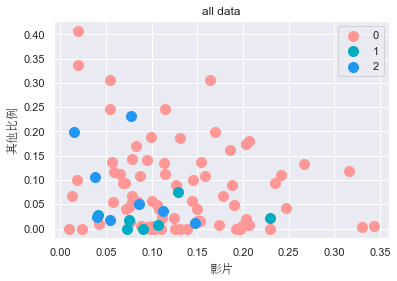

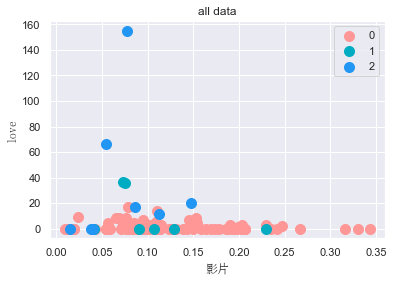

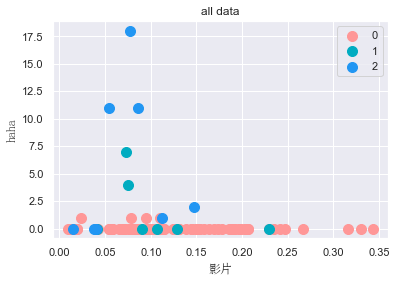

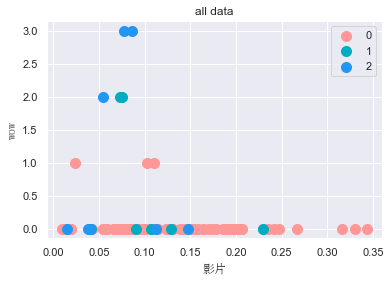

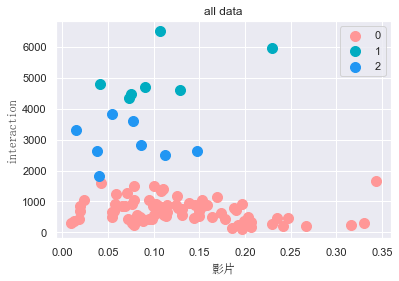

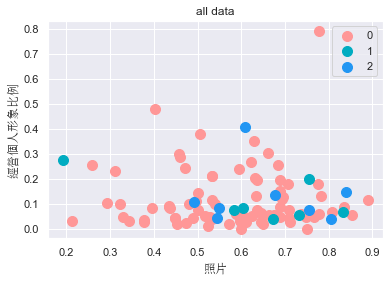

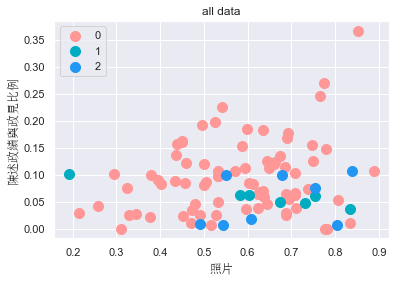

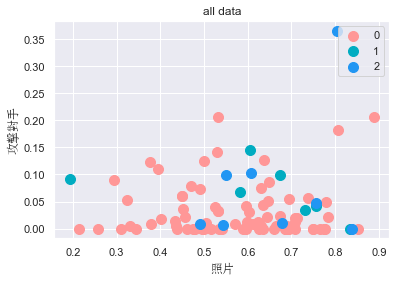

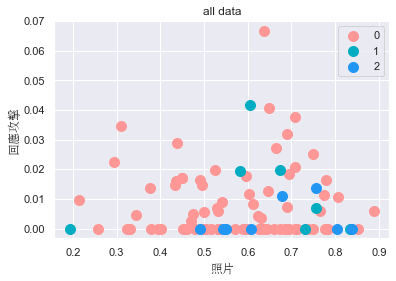

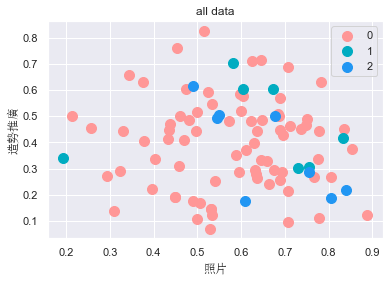

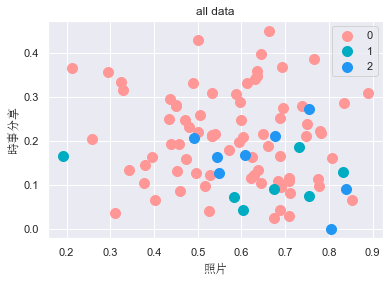

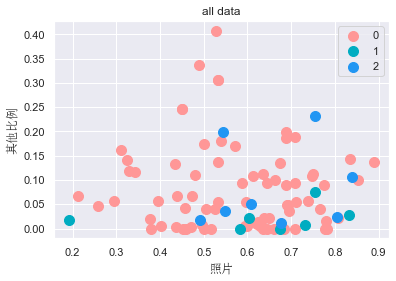

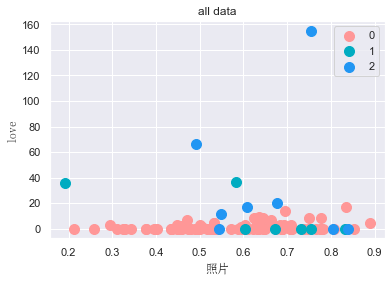

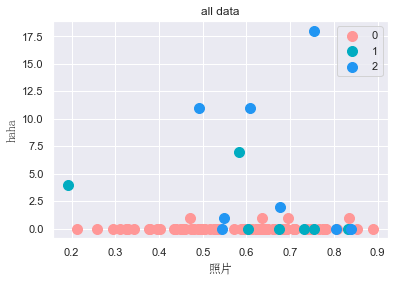

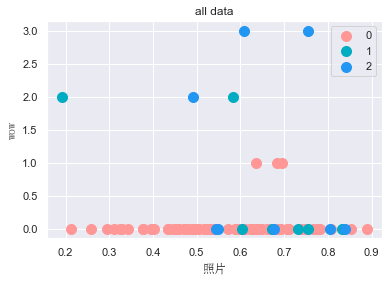

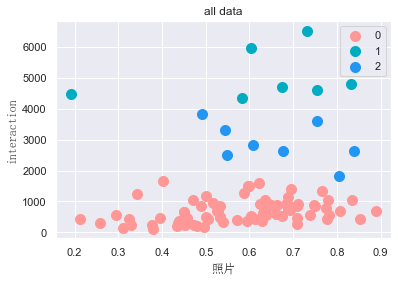

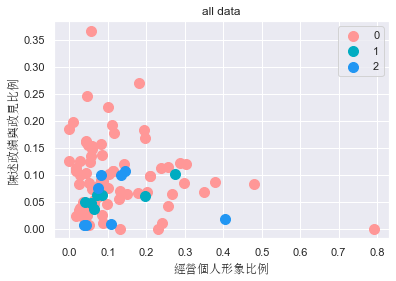

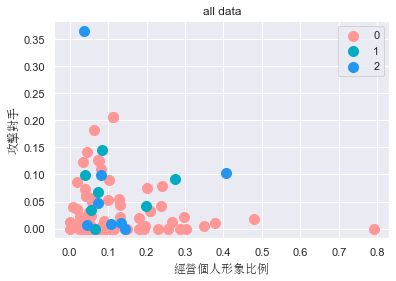

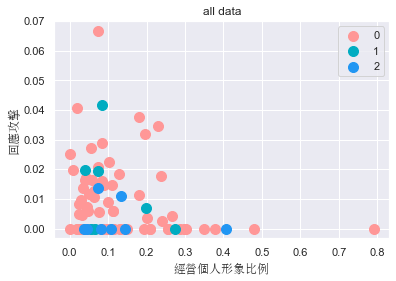

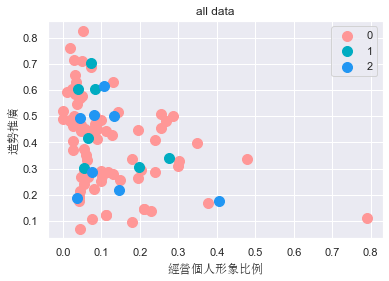

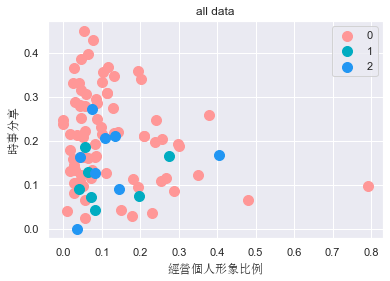

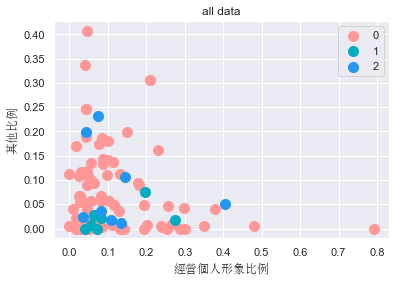

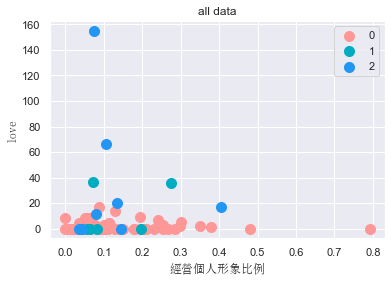

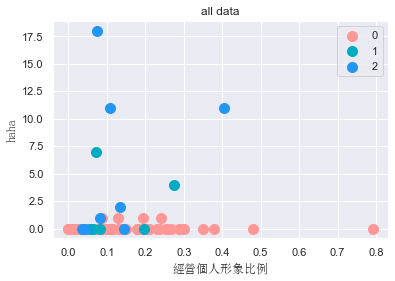

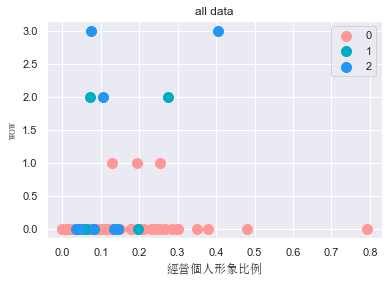

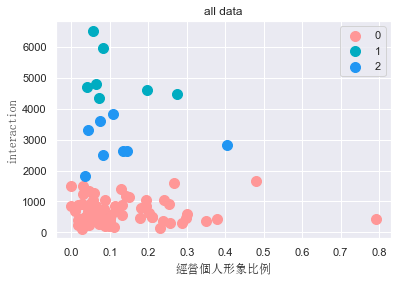

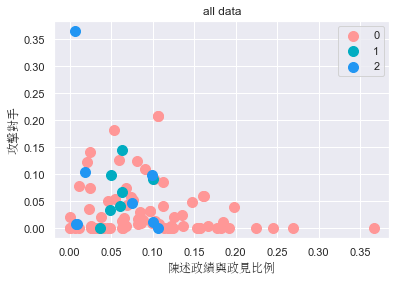

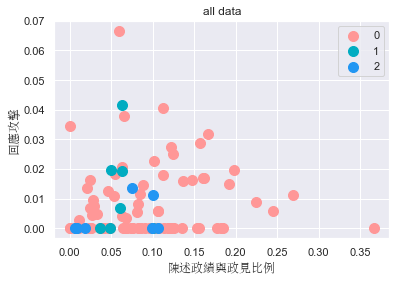

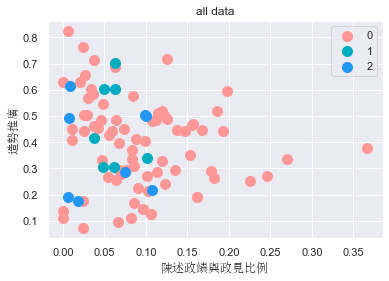

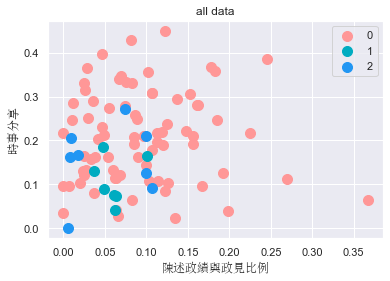

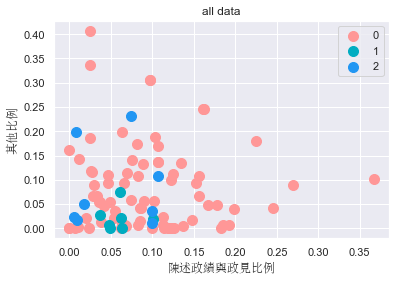

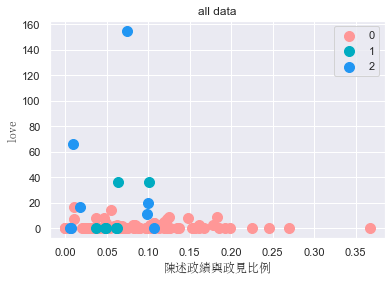

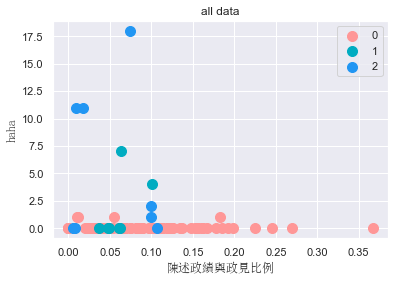

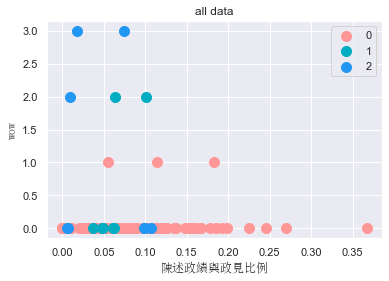

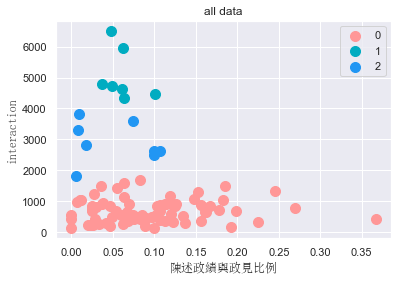

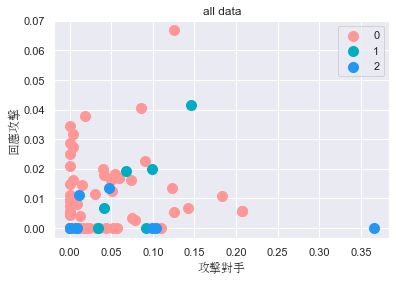

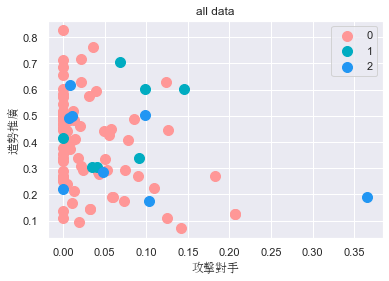

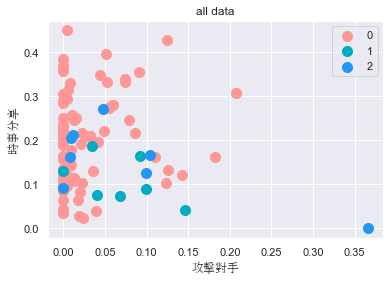

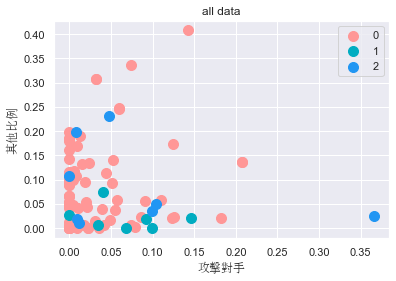

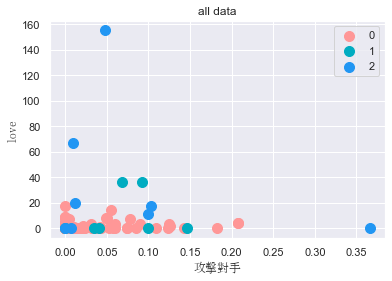

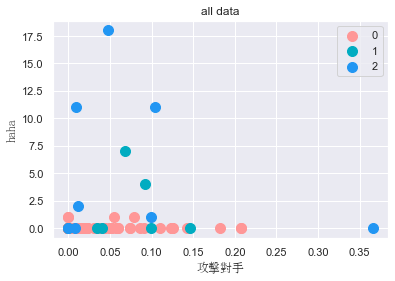

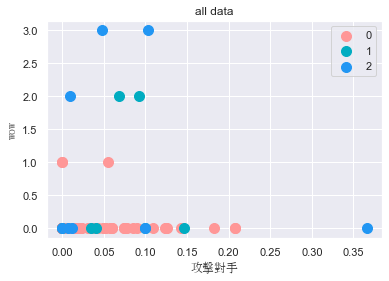

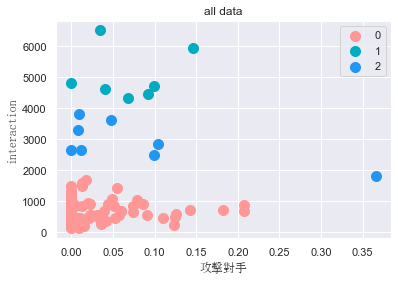

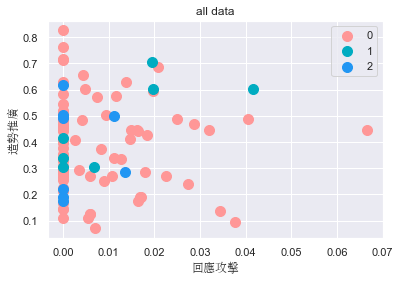

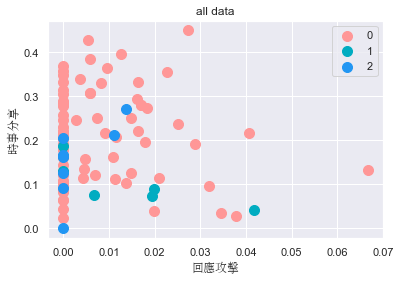

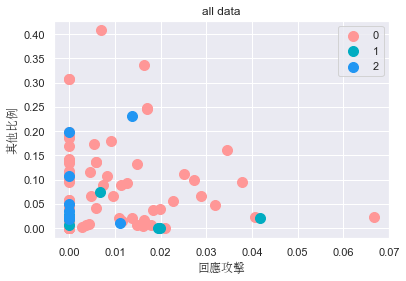

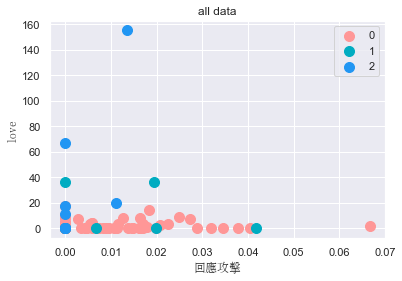

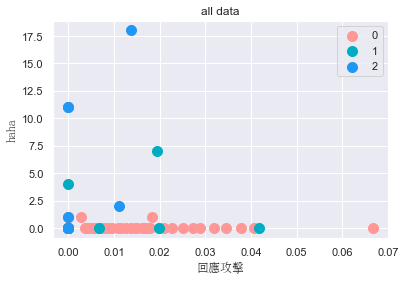

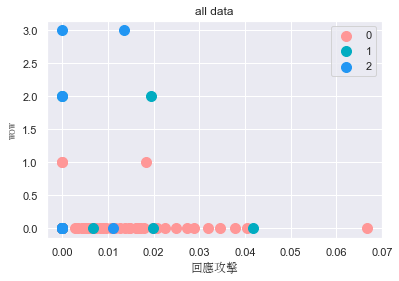

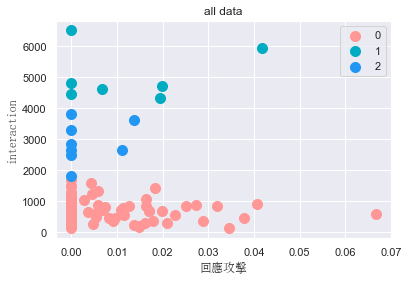

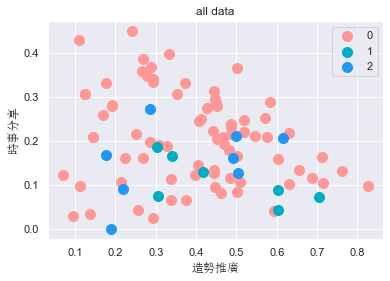

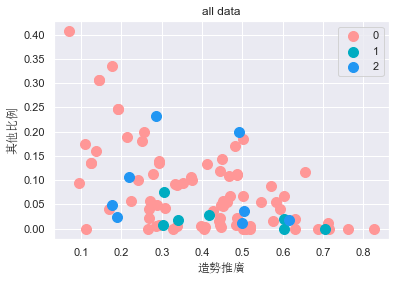

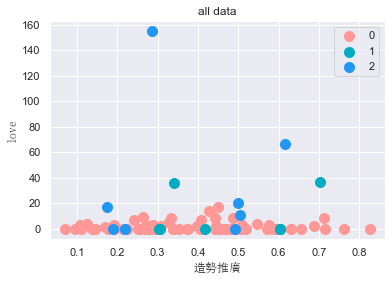

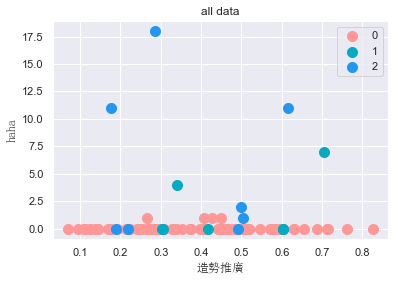

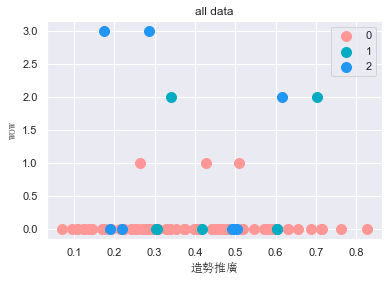

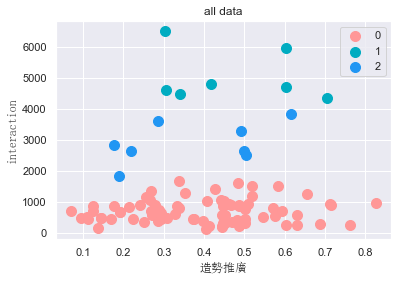

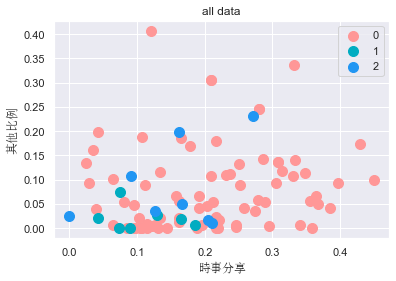

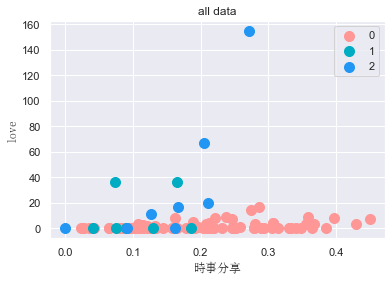

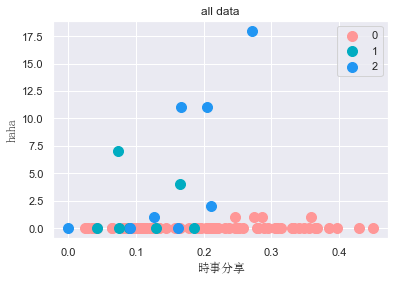

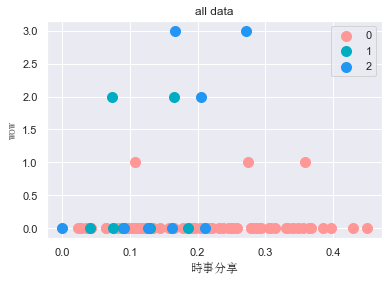

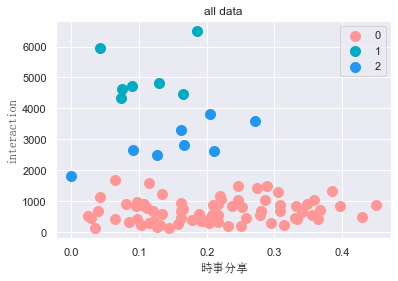

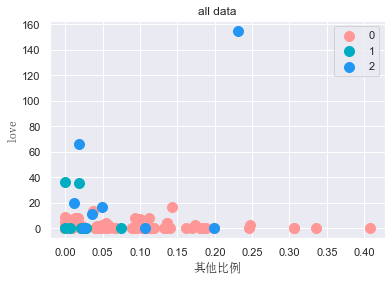

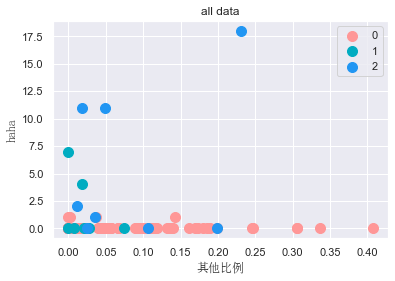

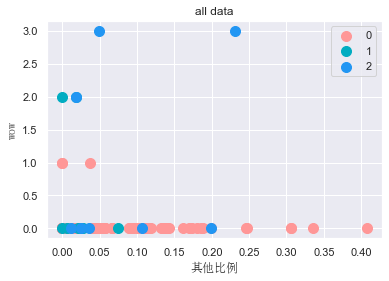

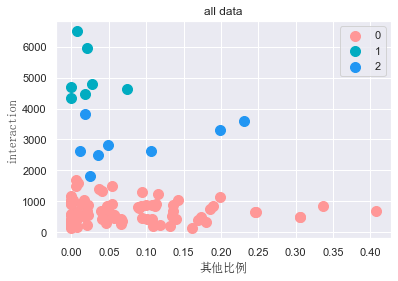

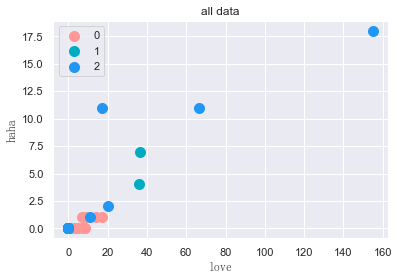

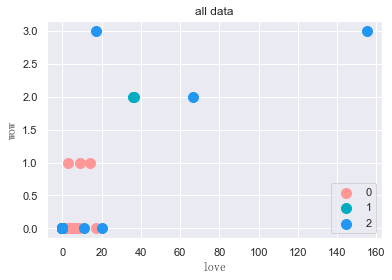

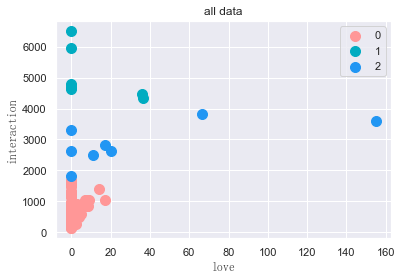

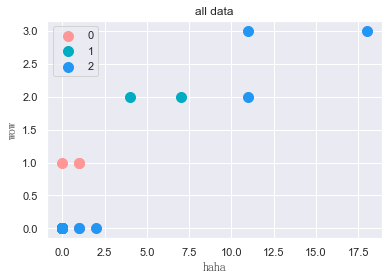

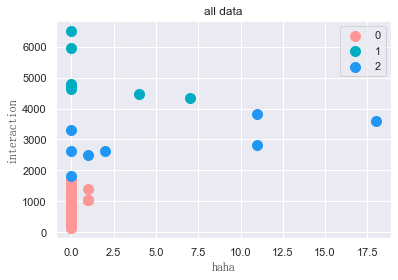

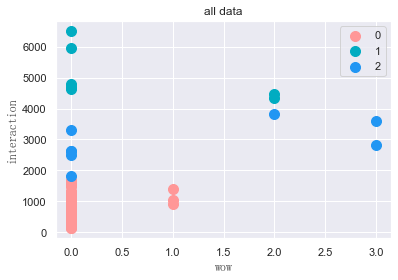

In [ ]:
cols = list(train_data.columns)
N = len(cols)
os.makedirs('互動加總')

for i in range(N):
    for j in range(i+1, N):
        plt.title('all data')
        for k in range(3):
            df = result.loc[result['y'] == k]
            plt.scatter(df.loc[:, cols[i]], df.loc[:, cols[j]], s=100, c=color[k], label=k)
#         plt.scatter(train.loc[:, cols[i]], train.loc[:, cols[j]], c=y_kmeans, s=200, cmap='viridis')
        plt.legend(loc='best')
        plt.xlabel(cols[i], fontsize=12, fontproperties="SimSun") #x軸標題
        plt.ylabel(cols[j], fontsize=12, fontproperties="SimSun") #y軸標題
#     plt.tight_layout() #隔開兩個圖
        plt.savefig('./互動加總/'+cols[i]+'&'+cols[j]+'.png')#儲存圖片
        plt.show()

# 心情數加總

In [ ]:
mood_li = []
size = len(train)
for i in range(len(train)):
    mood = train.loc[i, 'love'] + train.loc[i,'haha'] + train.loc[i,'wow']
    mood_li.append(mood)

In [ ]:
train_data = train.drop(['發文數', '分享數', '留言數', '讚數','love', 'haha', 'wow'], 1)
mood = pd.DataFrame(mood_li, columns =['mood']) 

In [ ]:
frames = [train_data, interact, mood]
train_data = pd.concat(frames, axis=1)

In [ ]:
train_data

貼文形式_有文字的比例  貼文形式_有超連結的比例        直播        影片        照片  經營個人形象比例  \
0      0.985816      0.226950  0.112903  0.169355  0.687943  0.148936   
1      0.954023      0.666667  0.314286  0.185714  0.310345  0.229885   
2      0.987124      0.356223  0.099476  0.099476  0.708155  0.042918   
3      0.975610      0.548780  0.126984  0.039683  0.804878  0.036585   
4      1.000000      0.441379  0.077670  0.106796  0.731034  0.055172   
..          ...           ...       ...       ...       ...       ...   
88     0.896970      0.193939  0.243902  0.085366  0.533333  0.036364   
89     0.967213      0.754098  0.025424  0.152542  0.778689  0.057377   
90     0.980769      0.530769  0.113725  0.149020  0.603846  0.050000   
91     0.976331      0.242604  0.153846  0.153846  0.532544  0.112426   
92     0.993056      0.222222  0.000000  0.056338  0.888889  0.112426   

    陳述政績與政見比例      攻擊對手      回應攻擊      造勢推廣      時事分享      其他比例  interaction  \
0    0.063830  0.000000  0.000000  0.255319  0.042553  0.198582       1146.0   
1    0.000000  0.000000  0.034483  0.137931  0.034483  0.160920        133.0   
2    0.103004  0.012876  0.000000  0.214592  0.107296  0.188841        843.0   
3    0.006098  0.365854  0.000000  0.189024  0.000000  0.024390       1826.0   
4    0.048276  0.034483  0.000000  0.303448  0.186207  0.006897       6515.0   
..        ...       ...       ...       ...       ...       ...          ...   
88   0.048485  0.000000  0.000000  0.545455  0.212121  0.054545        489.0   
89   0.147541  0.049180  0.016393  0.442623  0.221311  0.016393       1059.5   
90   0.084615  0.030769  0.011538  0.576923  0.207692  0.015385        542.5   
91   0.106509  0.207101  0.005917  0.124260  0.307692  0.136095        870.0   
92   0.106509  0.207101  0.005917  0.124260  0.307692  0.136095        692.0   

    mood  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0  
..   ...  
88   4.0  
89   8.0  
90   3.0  
91   4.0  
92   4.0  

[93 rows x 14 columns]

In [ ]:
n_clusters = 15
cost = []
for i in range(2,n_clusters):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(train_data)
    cost.append(kmeans.inertia_)

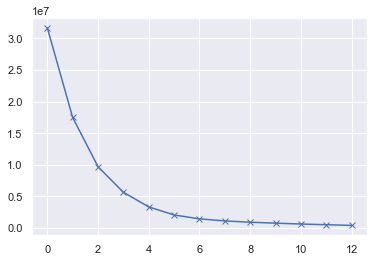

In [ ]:
plt.plot(cost,'bx-')

In [ ]:
silhouette_avgs = []
ks = range(2, 11)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(train_data)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(train_data, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    
silhouette_avgs

[0.8122280140001228,
 0.7648298932957754,
 0.5873489796176311,
 0.5969982956489669,
 0.6113490060433697,
 0.6254090205829888,
 0.5896589863360547,
 0.5847995202119404,
 0.5757888466539814]

In [ ]:
final_n_clusters = 3
final_kmeans = KMeans(final_n_clusters)
final_kmeans.fit(train_data)

KMeans(n_clusters=3)

In [ ]:
y_kmeans = final_kmeans.predict(train_data)
y_kmeans

array([1, 1, 1, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [ ]:
print(final_kmeans.score(train_data))
silhouette_avg = metrics.silhouette_score(train_data, y_kmeans)
print(silhouette_avg)
print(metrics.calinski_harabasz_score(train_data, y_kmeans))

-17949013.839985043
0.7266514658328349
368.65383669635617


In [ ]:
y = pd.DataFrame(y_kmeans, columns =['y'])
frames = [train_data, y]
result = pd.concat(frames, axis=1)
result

貼文形式_有文字的比例  貼文形式_有超連結的比例        直播        影片        照片  經營個人形象比例  \
0      0.985816      0.226950  0.112903  0.169355  0.687943  0.148936   
1      0.954023      0.666667  0.314286  0.185714  0.310345  0.229885   
2      0.987124      0.356223  0.099476  0.099476  0.708155  0.042918   
3      0.975610      0.548780  0.126984  0.039683  0.804878  0.036585   
4      1.000000      0.441379  0.077670  0.106796  0.731034  0.055172   
..          ...           ...       ...       ...       ...       ...   
88     0.896970      0.193939  0.243902  0.085366  0.533333  0.036364   
89     0.967213      0.754098  0.025424  0.152542  0.778689  0.057377   
90     0.980769      0.530769  0.113725  0.149020  0.603846  0.050000   
91     0.976331      0.242604  0.153846  0.153846  0.532544  0.112426   
92     0.993056      0.222222  0.000000  0.056338  0.888889  0.112426   

    陳述政績與政見比例      攻擊對手      回應攻擊      造勢推廣      時事分享      其他比例  interaction  \
0    0.063830  0.000000  0.000000  0.255319  0.042553  0.198582       1146.0   
1    0.000000  0.000000  0.034483  0.137931  0.034483  0.160920        133.0   
2    0.103004  0.012876  0.000000  0.214592  0.107296  0.188841        843.0   
3    0.006098  0.365854  0.000000  0.189024  0.000000  0.024390       1826.0   
4    0.048276  0.034483  0.000000  0.303448  0.186207  0.006897       6515.0   
..        ...       ...       ...       ...       ...       ...          ...   
88   0.048485  0.000000  0.000000  0.545455  0.212121  0.054545        489.0   
89   0.147541  0.049180  0.016393  0.442623  0.221311  0.016393       1059.5   
90   0.084615  0.030769  0.011538  0.576923  0.207692  0.015385        542.5   
91   0.106509  0.207101  0.005917  0.124260  0.307692  0.136095        870.0   
92   0.106509  0.207101  0.005917  0.124260  0.307692  0.136095        692.0   

    mood  y  
0    0.0  1  
1    0.0  1  
2    0.0  1  
3    0.0  0  
4    0.0  2  
..   ... ..  
88   4.0  1  
89   8.0  1  
90   3.0  1  
91   4.0  1  
92   4.0  1  

[93 rows x 15 columns]

In [ ]:
result.to_csv(r'result_心情加總&互動加總.csv', index = False)

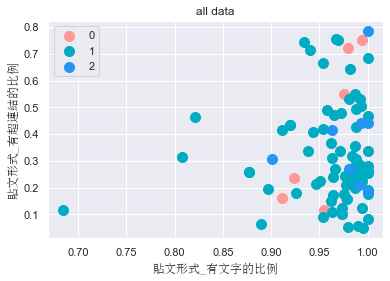

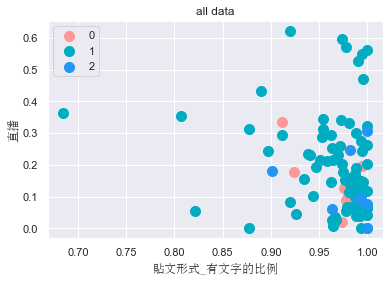

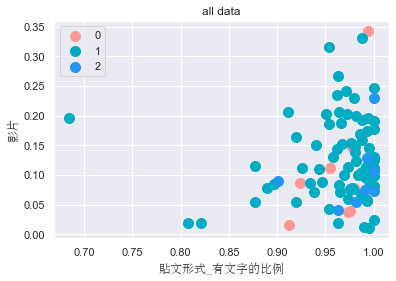

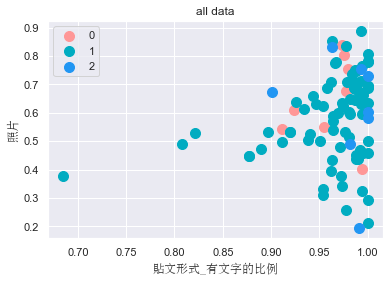

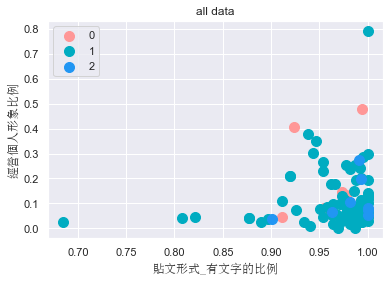

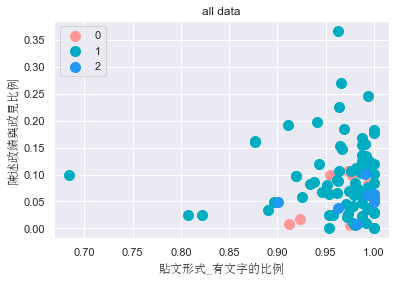

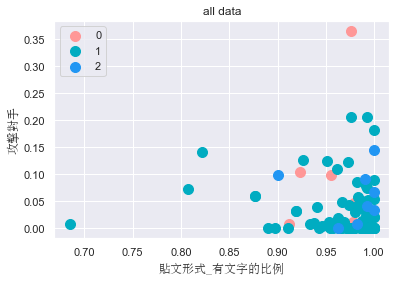

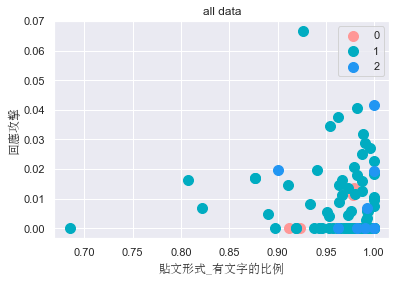

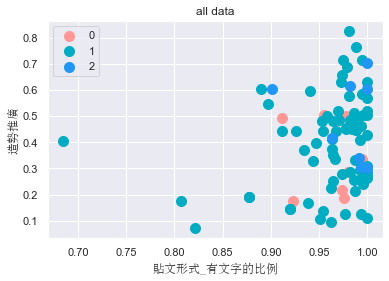

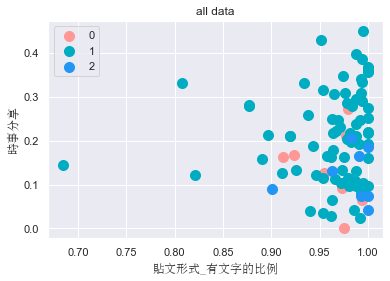

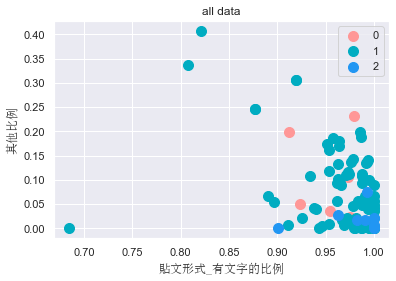

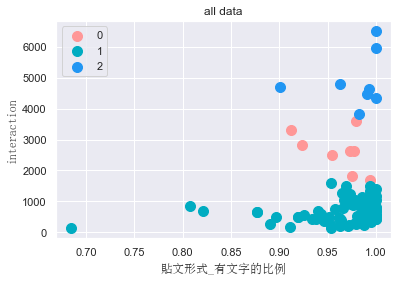

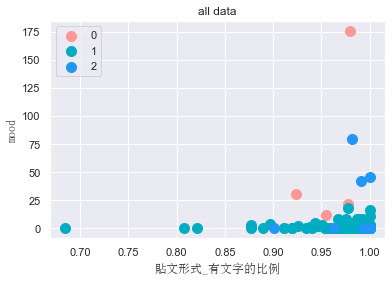

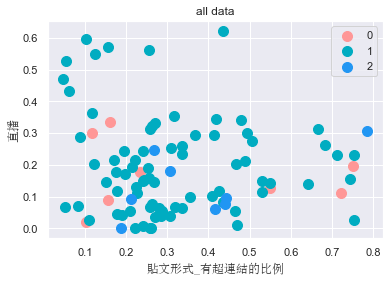

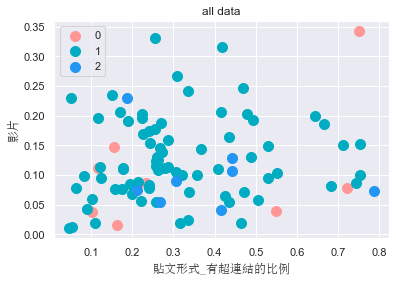

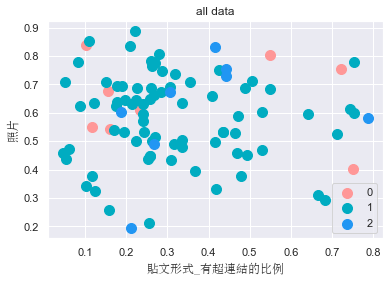

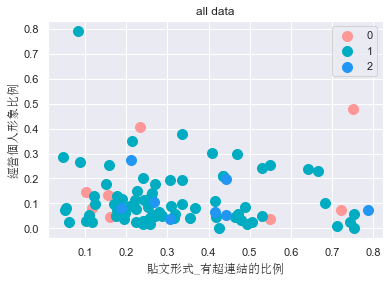

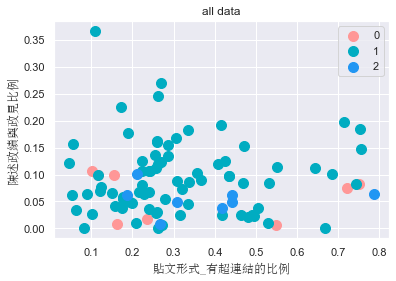

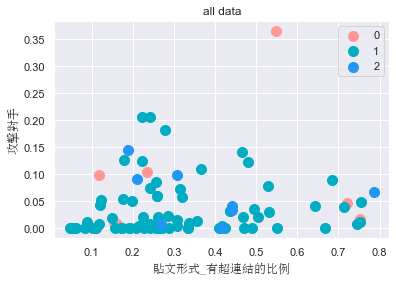

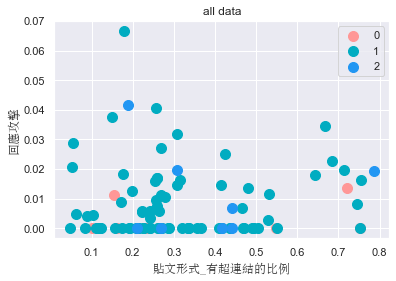

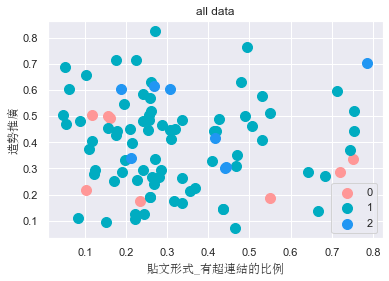

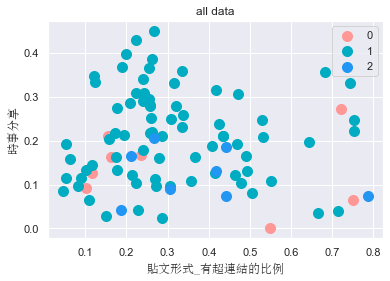

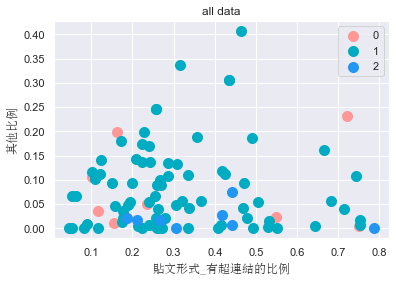

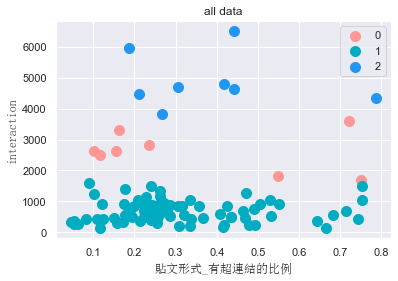

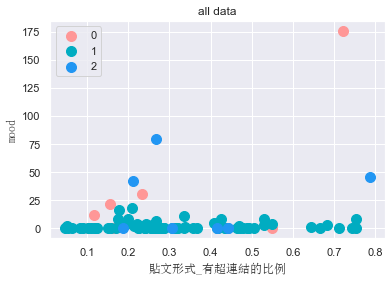

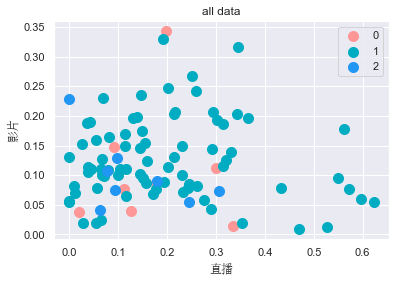

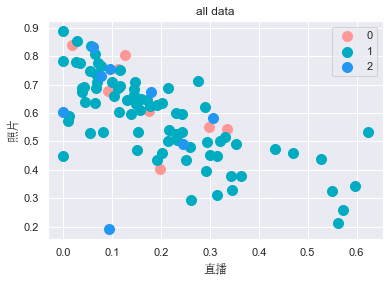

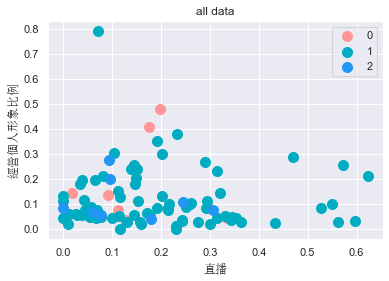

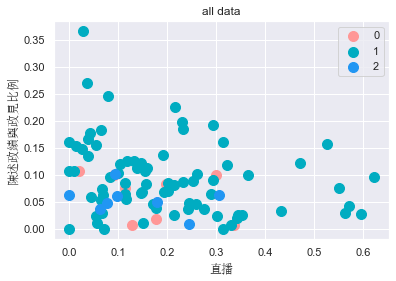

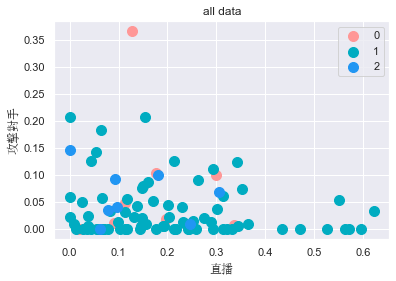

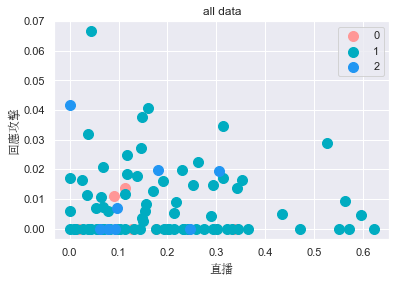

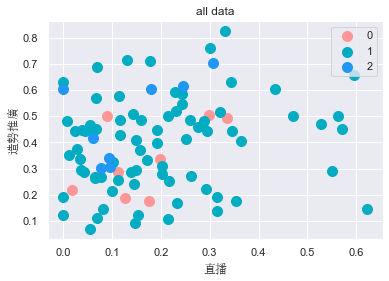

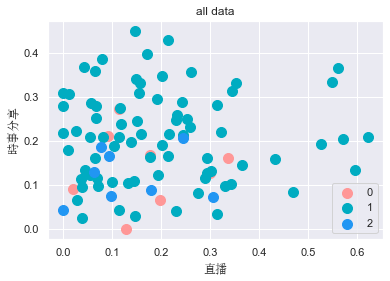

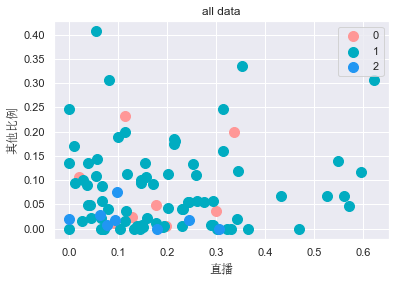

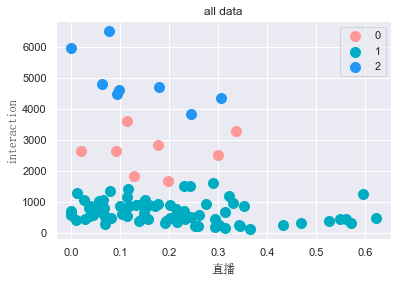

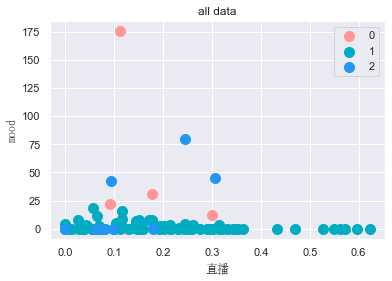

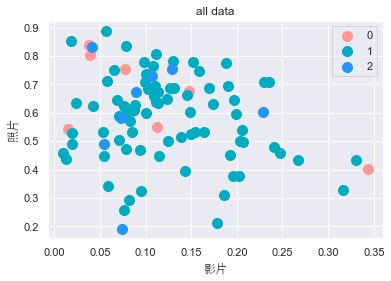

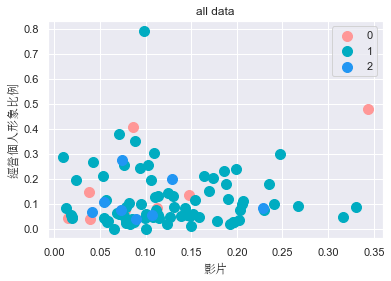

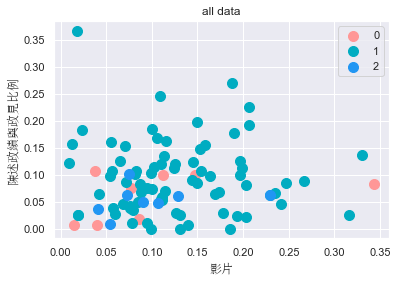

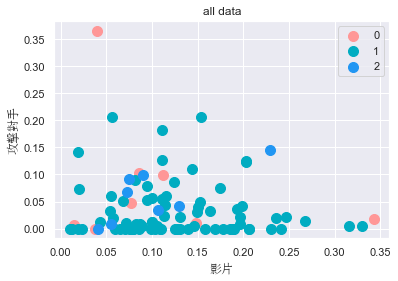

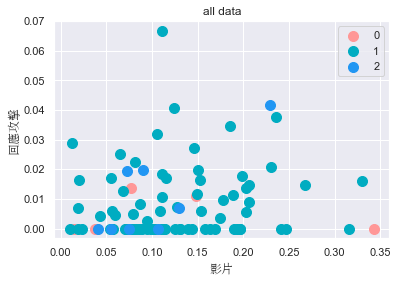

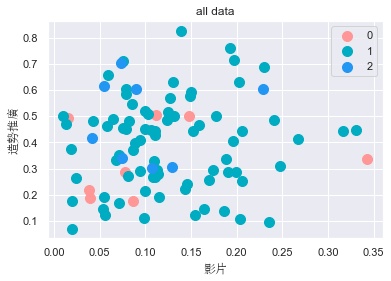

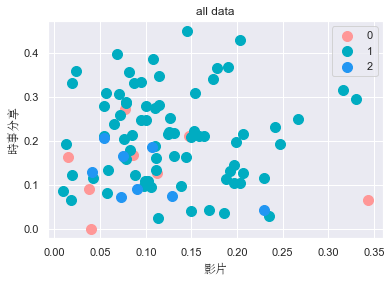

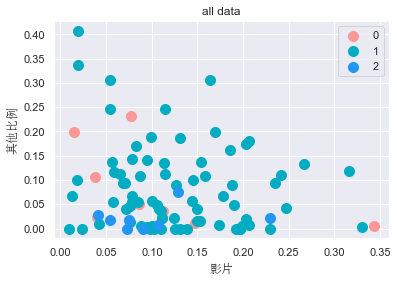

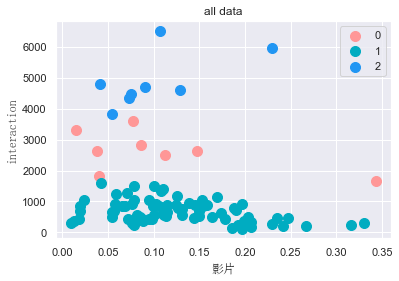

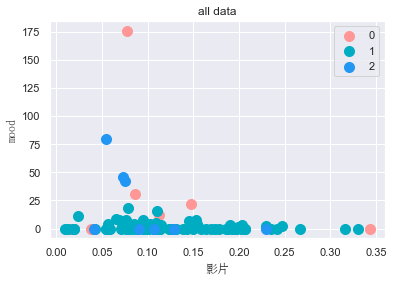

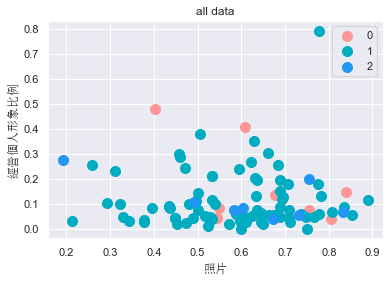

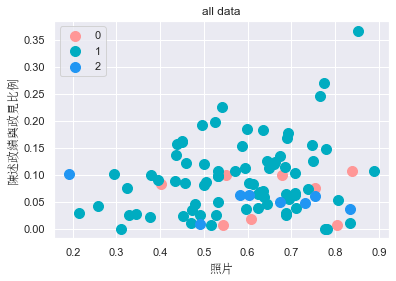

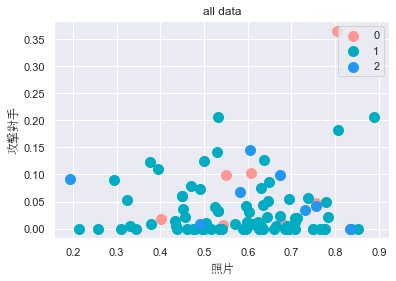

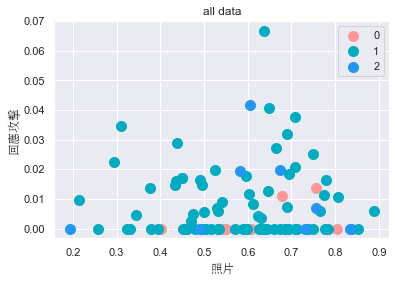

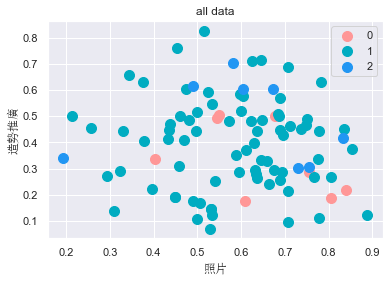

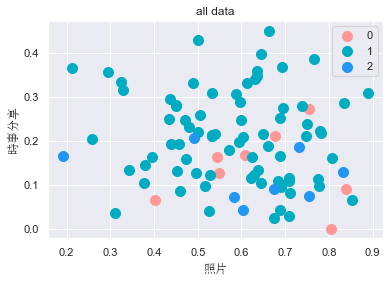

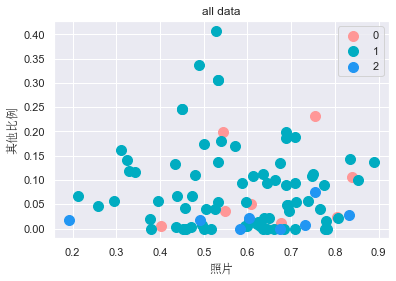

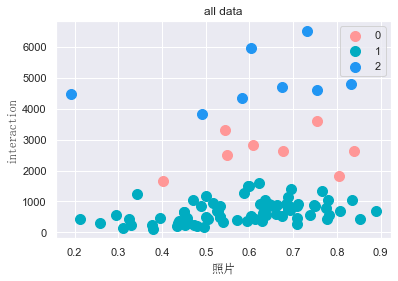

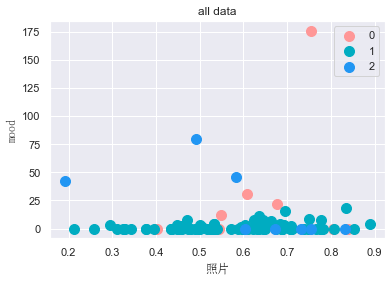

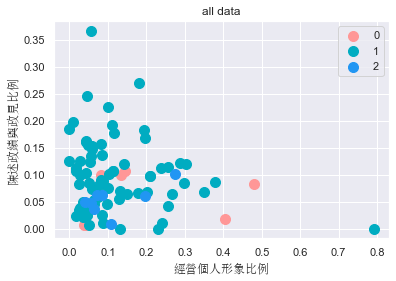

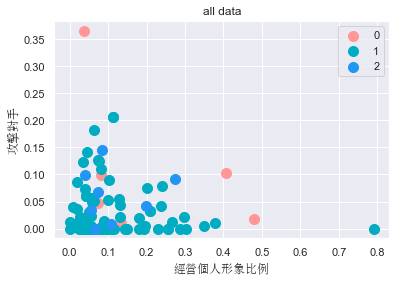

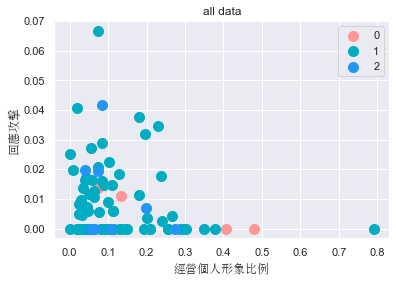

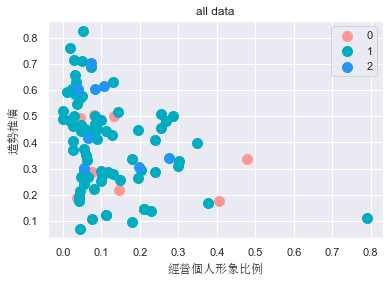

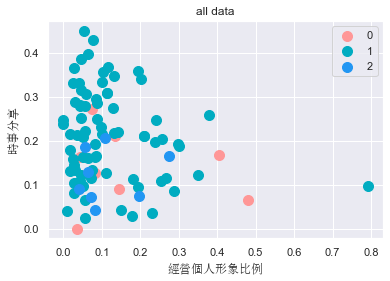

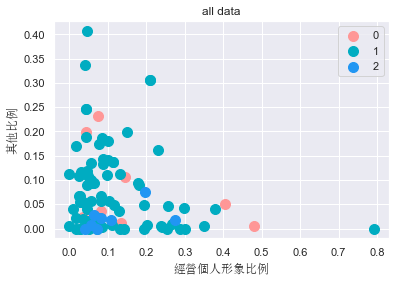

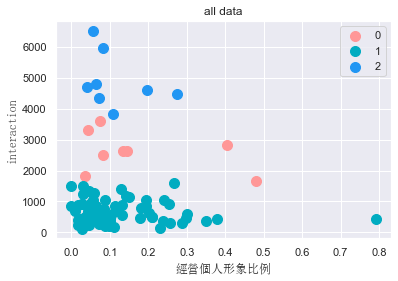

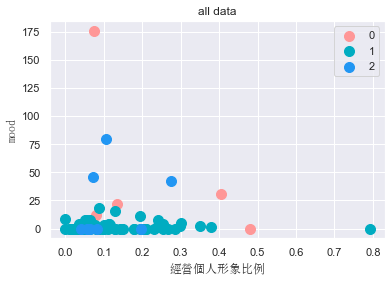

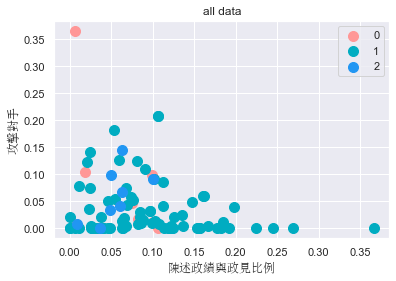

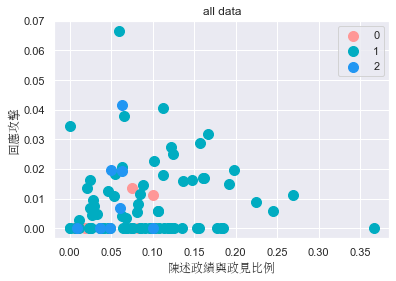

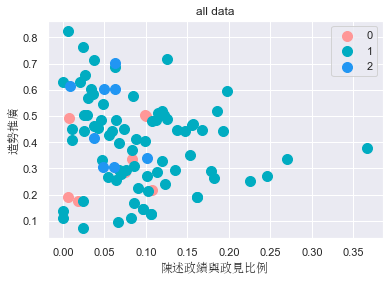

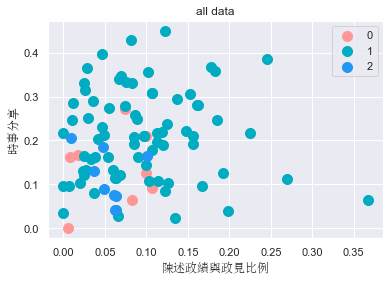

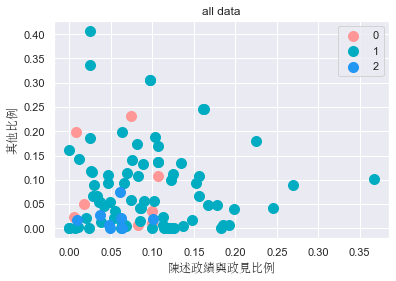

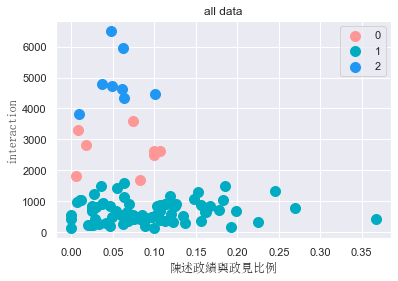

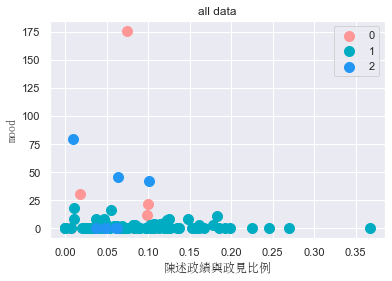

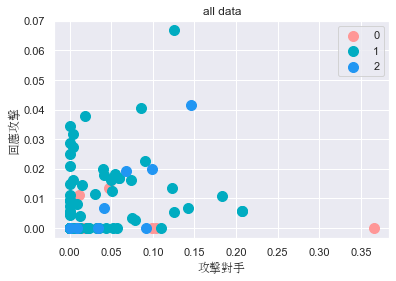

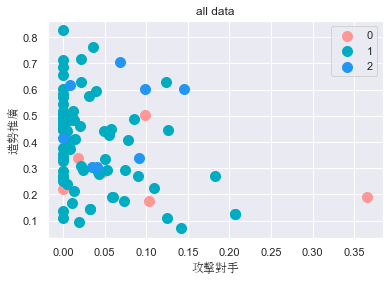

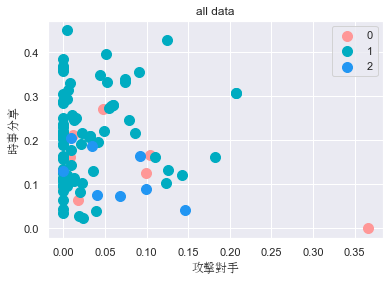

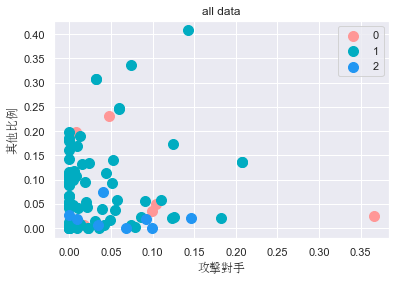

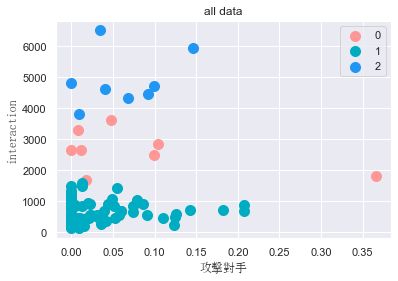

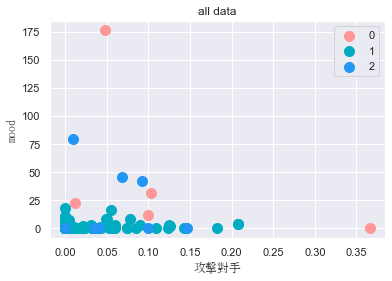

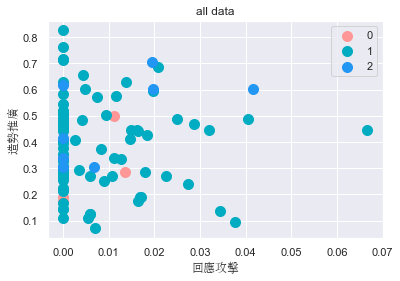

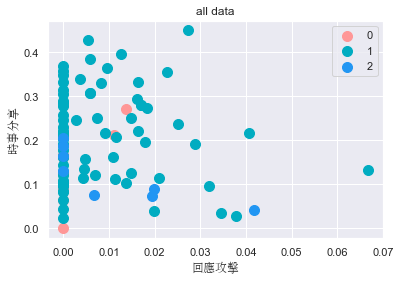

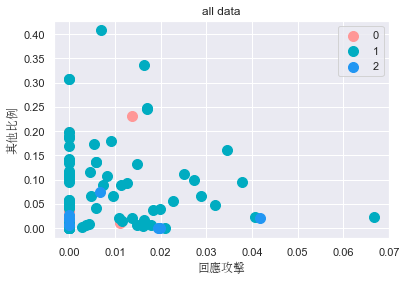

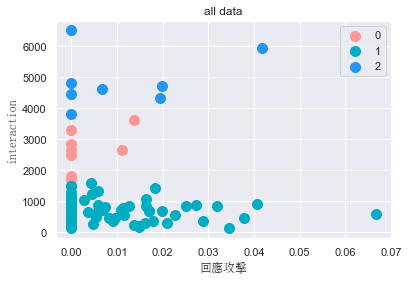

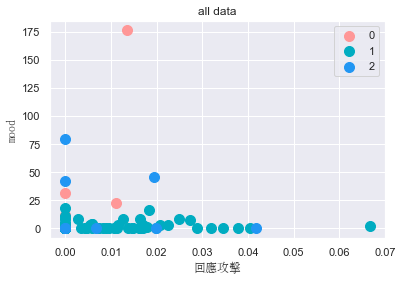

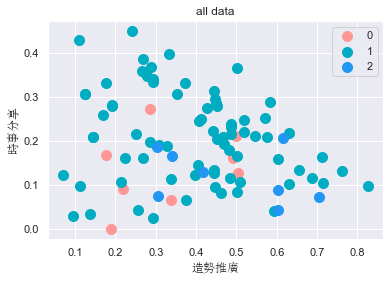

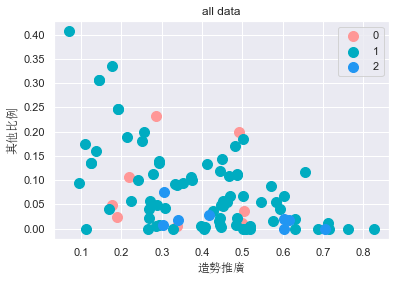

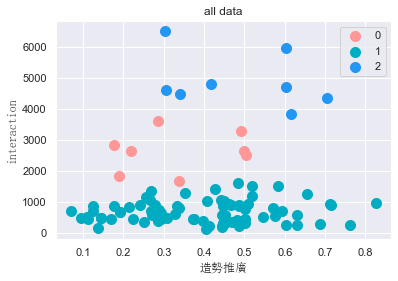

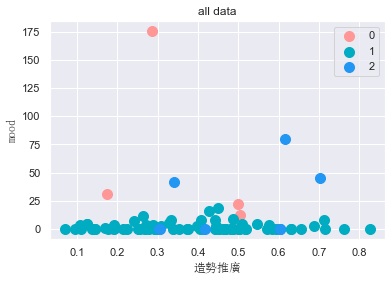

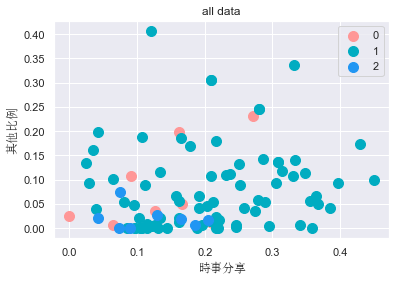

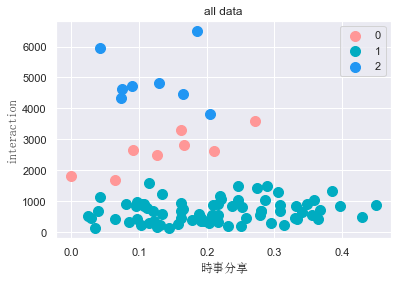

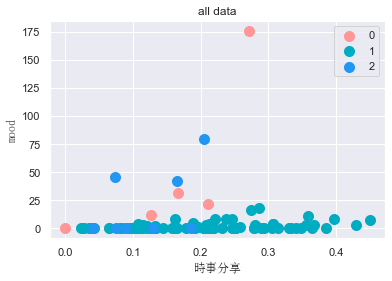

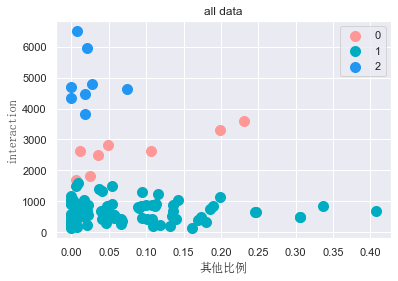

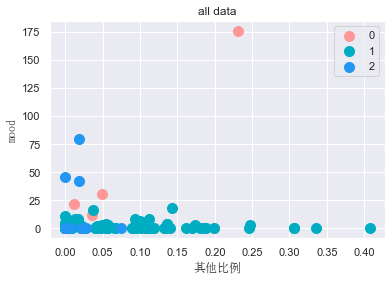

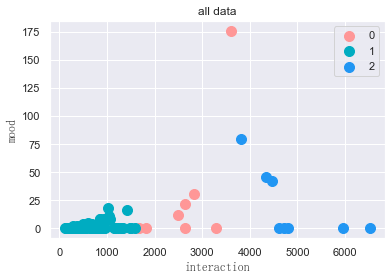

In [ ]:
cols = list(train_data.columns)
N = len(cols)
os.makedirs('心情加總&互動加總')

for i in range(N): 
    for j in range(i+1, N):
        plt.title('all data')
        for k in range(3):
            df = result.loc[result['y'] == k]
            plt.scatter(df.loc[:, cols[i]], df.loc[:, cols[j]], s=100, c=color[k], label=k)
#         plt.scatter(train.loc[:, cols[i]], train.loc[:, cols[j]], c=y_kmeans, s=200, cmap='viridis')
        plt.legend(loc='best')
        plt.xlabel(cols[i], fontsize=12, fontproperties="SimSun") #x軸標題
        plt.ylabel(cols[j], fontsize=12, fontproperties="SimSun") #y軸標題
#     plt.tight_layout() #隔開兩個圖
        plt.savefig('./心情加總&互動加總/'+cols[i]+'&'+cols[j]+'.png')#儲存圖片
        plt.show()